In [2]:
import matplotlib.pyplot as plt 
import numpy as np 
# import pandas as pd 
import matplotlib as mpl
import os
import json 
from scipy import optimize

In [3]:
theta = np.linspace(0,2*np.pi,500)
# x= np.cos(theta)
# y = np.sin(theta)

In [4]:
current_dir = os.getcwd()
current_dir

'/home/mrojasve/Documents/DDG/MiraculousMembranes/projects/geometric-flow/Scripts'

In [5]:
Results_dir = current_dir+'/projects/geometric-flow/Results/'
Results_dir = current_dir+'/../Results/'

Sims_dir = Results_dir + 'Two_beads_outside_outside_BFGS/'

In [6]:
dir_list = os.listdir(Sims_dir)

# print("The directories are :\n")
# for i in dir_list:
#     print("{}".format(i))

In [7]:
cmap = mpl.cm.plasma
norm = mpl.colors.Normalize(vmin=0.325, vmax=1.6)

In [8]:
Simulation = Sims_dir + "{}/".format(9)
Output_dir = Simulation + 'Output_data.txt' 
Data_sim = json.load(open(Simulation+"Input_file.json"))

Sim_data = np.loadtxt(Output_dir, skiprows=1)



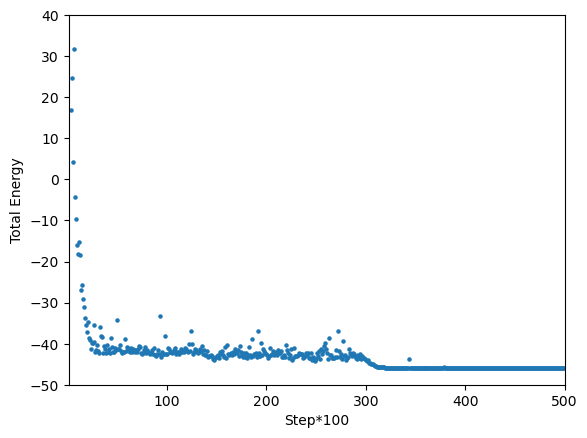

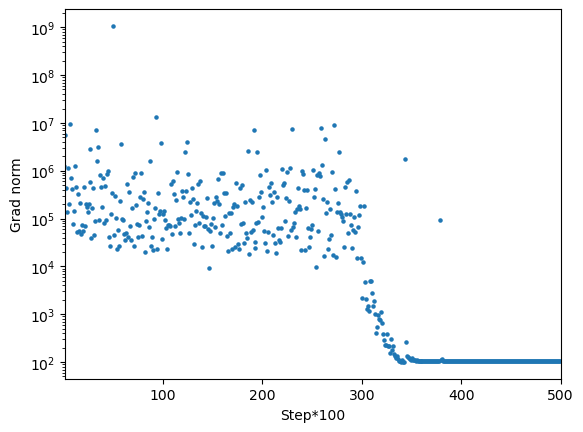

In [9]:
plt.scatter(np.arange(len(Sim_data[:,8])) ,Sim_data[:,8],label='Bending Energy',s=5 )
plt.xlim(1,500)
plt.ylim(-50,40)
plt.xlabel('Step*100')
plt.ylabel('Total Energy')
plt.show()


plt.scatter(np.arange(len(Sim_data[:,14])) ,Sim_data[:,14],label='Bending Energy',s=5 )
plt.xlim(1,500)
plt.yscale('log')
plt.xlabel('Step*100')
plt.ylabel('Grad norm')
plt.show()



In [10]:
Sims_dir = Results_dir + 'Wrapping_single_convergence/'
Simulation = Sims_dir + "Bending_20.0000_0.0000_Area_constraint_100000.0000_50.1663_Volume_constraint_100000.0000_33.3189_Bead_radius_0.2000_Frenkel_Normal_nopush_str_600.0000_Switch_IpOpt_Switch_Save_all_Switch_BFGS-Normal_Nsim_1/"
Simulation2 = Sims_dir + "45/"

Output_dir = Simulation + 'Output_data.txt' 
Data_sim = json.load(open(Simulation+"Input_file.json"))

Sim_data = np.loadtxt(Output_dir, skiprows=1)


Output_dir2 = Simulation2 + 'Output_data.txt' 
Data_sim2 = json.load(open(Simulation2+"Input_file.json"))

Sim_data2 = np.loadtxt(Output_dir2, skiprows=1)



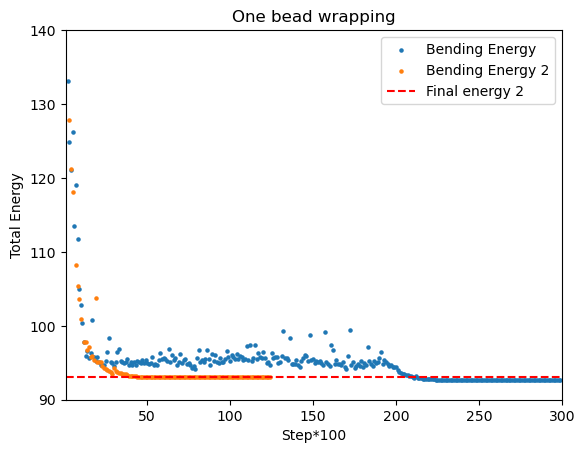

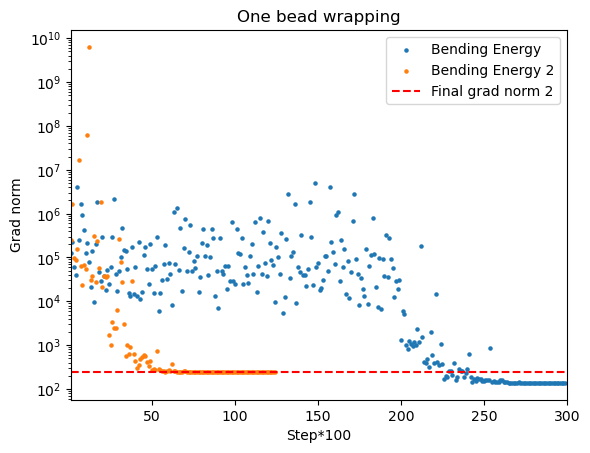

In [13]:
plt.scatter(np.arange(len(Sim_data[:,7])) ,Sim_data[:,7],label='Bending Energy',s=5 )
plt.scatter(np.arange(len(Sim_data2[:,7])) ,Sim_data2[:,7],label='Bending Energy 2',s=5 )
plt.axhline(Sim_data2[-1,7],color='r',linestyle='--',label='Final energy 2')
plt.xlim(1,300)
# plt.ylim(-50,40)
plt.legend()
plt.xlabel('Step*100')
plt.ylim(90,140)
plt.ylabel('Total Energy')
plt.title("One bead wrapping")
plt.show()

plt.scatter(np.arange(len(Sim_data[:,7])) ,Sim_data[:,12],label='Bending Energy',s=5 )
plt.scatter(np.arange(len(Sim_data2[:,7])) ,Sim_data2[:,12],label='Bending Energy 2',s=5 )
plt.axhline(Sim_data2[-1,12],color='r',linestyle='--',label='Final grad norm 2')
plt.legend()
plt.xlim(1,300)
plt.yscale('log')
plt.xlabel('Step*100')
plt.ylabel('Grad norm')
plt.title("One bead wrapping")
plt.show()

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


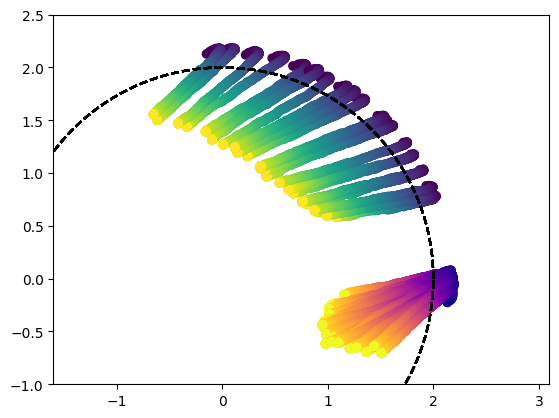

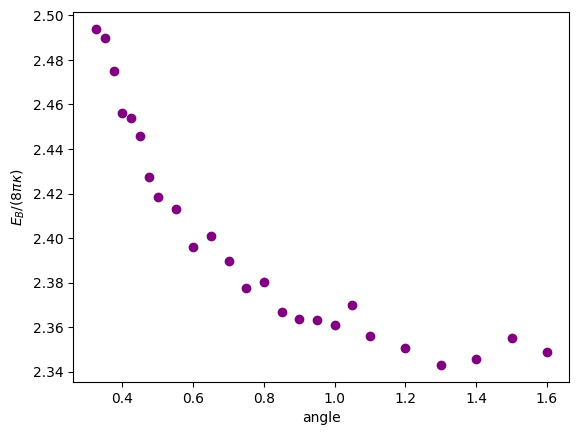

In [220]:
Bead_DISTANCES = []
Thetas = []

# fig, ax = plt.subplots(layout='constrained')

# fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
            #  ax=ax, orientation='vertical', label='Angle (radians)')
Bendings = []
for i in range(1,26):
    E_Bead_1 = []
    E_Bead_2 = []
    E_Bend = []
    E_Sur = []
    # i = 5
    # Simulation = Sims_dir+"Bending_20.0000_Volume_constraint_10000.0000_33.3189_Edge_reg_0.0000_1.0000_Bead_radius_0.2000_Frenkel_Normal_nopush_str_700.0000_Bead_radius_0.2000_Frenkel_Normal_nopush_str_700.0000_Bonds_Harmonic_400.0000_Harmonic_400.0000_Switch_Newton_Nsim_3"+"/"
    Simulation = Sims_dir+"{}".format(i)+"/"


    Output_dir = Simulation+'Output_data.txt'
    # print(Output_dir)
    Data_sim = json.load(open(Simulation+"Input_file.json"))

    Pos2 = Data_sim['Beads'][1]['Pos']
    # print("The bead is initially at position {}".format(Data_sim["Beads"][1]["Pos"]))

    angle = np.arctan2(Pos2[1],Pos2[0])
    Thetas.append(angle)
    L0 = Data_sim['Beads'][0]['bonds_constants'][0][1]
    # print("THe angle is {}".format(angle))
    # print("THe length is {}".format(L0))

    Sim_data = np.loadtxt(Output_dir,skiprows=1,usecols=[3,4,5,6,7])



    E_Bend = Sim_data[:,0]
    Bendings.append(E_Bend[-1])
    E_Vol = Sim_data[:,1]
    E_Bead_1 = Sim_data[:,2]
    E_Bead_2 = Sim_data[:,3]

    E_Tot = Sim_data[:,4]

    Bead_1_traj = np.loadtxt(Simulation+"Bead_0_data.txt",skiprows=1)
    Bead_2_traj = np.loadtxt(Simulation+"Bead_1_data.txt",skiprows=1)
    Bead_1_pos = Bead_1_traj[-1,0:3]
    Bead_2_pos = Bead_2_traj[-1,0:3]
    time = np.arange(len(Bead_1_traj[:,0]))
    plt.scatter(Bead_1_traj[:,0],Bead_1_traj[:,1],c=time,cmap='plasma')
    plt.scatter(Bead_2_traj[:,0],Bead_2_traj[:,1],c=time,cmap='viridis')
    plt.plot(2*x,2*y,color='black',ls='dashed')
    plt.xlim(0,2)
    plt.ylim(0,2)
    # plt.title("theta={}".format(angle))
    # plt.xlim(1,2)
    # plt.ylim(-0.5,0.5)
    # plt.show()


    Bead_distance = []
    for j in range(len(Bead_1_traj)):
        Bead_1_pos = Bead_1_traj[j,0:3]
        Bead_2_pos = Bead_2_traj[j,0:3]
        r = np.linalg.norm( Bead_1_pos-Bead_2_pos ) - L0
        Bead_distance.append(r)
        

    # ax.plot(Bead_distance,label='{}'.format(angle),color=cmap(norm(angle)))
    Bead_DISTANCES.append(Bead_distance[-1])
# plt.legend()
# ax.axhline(0.0,ls='dashed',color='black')
plt.axis('equal')
plt.xlim(-1,2.5)
plt.ylim(-1,2.5)
# plt.axis('equal')
plt.show()

# ax.cla()

plt.scatter(Thetas,np.array(Bendings)/(4*np.pi*20),color='purple')
plt.ylabel(r'$E_B/(8\pi \kappa)$')
plt.xlabel(r'angle')
# plt.scatter(Thetas,np.array(Bendings)/(4*np.pi*20))
# plt.ylabel('E_B/(8*PiKB)')
plt.show()

# plt.ylim(-0.05,0.05)

In [162]:
def calc_R(xc, yc,x_D,y_D):
    """ calculate the distance of each 2D points from the center (xc, yc) """
    return np.sqrt((x_D-xc)**2 + (y_D-yc)**2)

def f_2(c,x_D,y_D):
    """ calculate the algebraic distance between the data points and the mean circle centered at c=(xc, yc) """
    Ri = calc_R(*c,x_D,y_D)
    return Ri - Ri.mean()


In [163]:
def Slice_last_step(Directory):
    Final_state = open(Directory+"Final_state.obj","r")

    Mesh_slice_x = []
    Mesh_slice_y = []
    for line in Final_state:
        
        if(line[0]=='f'):
            break
        if(line[0]=='#'):
            continue
        Splitted_line = line.split(' ')
        x = float(Splitted_line[1])
        y = float(Splitted_line[2])
        z = float(Splitted_line[3])
        
        if(np.abs(z)<0.2):
            Mesh_slice_x.append(x)
            Mesh_slice_y.append(y)

    


        # Now the idea is that i want to plot a scatter plot of all the points with z small

    Final_state.close()
    return (Mesh_slice_x,Mesh_slice_y)
def Last_bead_pos(Directory):
    Bead_data_1 = np.loadtxt(Directory + "Bead_0_data.txt",skiprows=1)
    Bead_data_2 = np.loadtxt(Directory + "Bead_1_data.txt",skiprows=1)
    
    Pos1 = Bead_data_1[-1,:][0:3]
    Pos2 = Bead_data_2[-1,:][0:3]

    print("The positions are {} and {}".format(Pos1,Pos2) )
    return Pos1,Pos2


The positions are [ 0.976303  -0.718062  -0.0136044] and [1.08261   0.0989111 0.0423109]
The radius is 1.9900296525236048 centered at (-1.114930579924323,0.0014282527784196966)
The final angle is 0.37653419017234796
THe lame distance is 1.8499999999999999


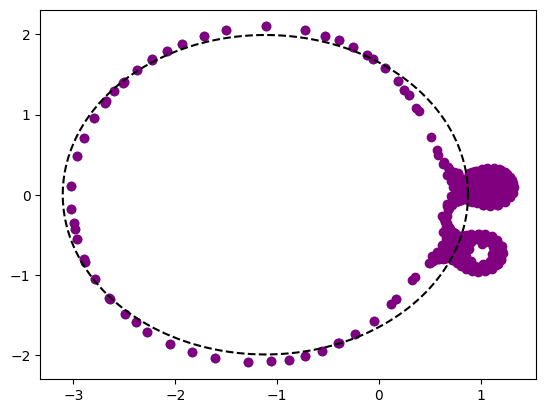

In [170]:
Simulation = Sims_dir+"1/"


Xpos , Ypos = Slice_last_step(Simulation)

Pos1, Pos2 = Last_bead_pos(Simulation)


# I want to create x and y but they should
x = []
y = []
for i in range(len(Xpos)):
    if(Xpos[i]<0.0 or np.abs(Ypos[i]) > 1.1):
        x.append(Xpos[i])
        y.append(Ypos[i])

plt.scatter(x,y)
x = np.array(x)
y = np.array(y)

center_estimate = np.mean(x), np.mean(y)
center_2, ier = optimize.leastsq(f_2,center_estimate,args=(x,y))

xc_2 , yc_2 = center_2
Ri_2 = calc_R(*center_2,x,y)
R_2 = Ri_2.mean()

theta = np.linspace(0,2*np.pi,200)
XC = center_2[0]+ R_2*np.cos(theta) 
YC = center_2[1] + R_2*np.sin(theta)

plt.plot(XC,YC,color='black',ls='dashed')

plt.scatter(Xpos,Ypos,color='purple')
print("The radius is {} centered at ({},{})".format(R_2, center_2[0],center_2[1]))

# Lets calculate the angle now 
Fit_center = np.array([center_2[0],center_2[1],0.0])

D1 = Pos1 - Fit_center
D2 = Pos2 - Fit_center

theta_f = np.arccos(  np.sum(D1*D2)/(np.linalg.norm(D1)*np.linalg.norm(D2) )  )
print("The final angle is {}".format(theta_f))

Lame_dist = 2.0*0.37/(0.4)
print("THe lame distance is {}".format(Lame_dist))


In [166]:
Lame_dist

1.8499999999999999

In [190]:

def Fitting_circle_bead_distance(Simulation):
    Xpos , Ypos = Slice_last_step(Simulation)

    Pos1, Pos2 = Last_bead_pos(Simulation)


    # I want to create x and y but they should
    x_D = []
    y_D = []
    for i in range(len(Xpos)):

        dist =  np.linalg.norm(Pos1 - np.array([Xpos[i], Ypos[i],0]))
        dist2 = np.linalg.norm(Pos2 - np.array([Xpos[i], Ypos[i],0]))
        if(dist > 0.5 and dist2 >0.5):
            x_D.append(Xpos[i])
            y_D.append(Ypos[i])

    plt.scatter(x_D,y_D)
    x_D = np.array(x_D)
    y_D = np.array(y_D)

    center_estimate = np.mean(x_D), np.mean(y_D)
    center_2, ier = optimize.leastsq(f_2,center_estimate, args=(x_D,y_D))

    xc_2 , yc_2 = center_2
    Ri_2 = calc_R(*center_2,x_D,y_D)
    R_2 = Ri_2.mean()

    theta = np.linspace(0,2*np.pi,200)
    XC = center_2[0]+ R_2*np.cos(theta) 
    YC = center_2[1] + R_2*np.sin(theta)

    plt.plot(XC,YC,color='black',ls='dashed')

    plt.scatter(x_D,y_D,color='purple')
    print("The radius is {} centered at ({},{})".format(R_2, center_2[0],center_2[1]))

    # Lets calculate the angle now 
    Fit_center = np.array([center_2[0],center_2[1],0.0])

    D1 = Pos1 - Fit_center
    D2 = Pos2 - Fit_center

    theta_f = np.arccos(  np.sum(D1*D2)/(np.linalg.norm(D1)*np.linalg.norm(D2) )  )
    print("The final angle is {}".format(theta_f))

    Lame_dist = 2.0*theta_f
    print("THe lame distance is {}".format(Lame_dist))


    return Lame_dist



In [191]:
# Results_dir = current_dir+'/../Results/'
Sims_dir = Results_dir + 'Two_beads_no_spring_inside_inside/'

The positions are [ 0.976303  -0.718062  -0.0136044] and [1.08261   0.0989111 0.0423109]
The radius is 1.9510357671941527 centered at (-1.1861466852575149,0.002768558840430882)
The final angle is 0.36492123927994713
THe lame distance is 0.7298424785598943
The original angle is 0.35


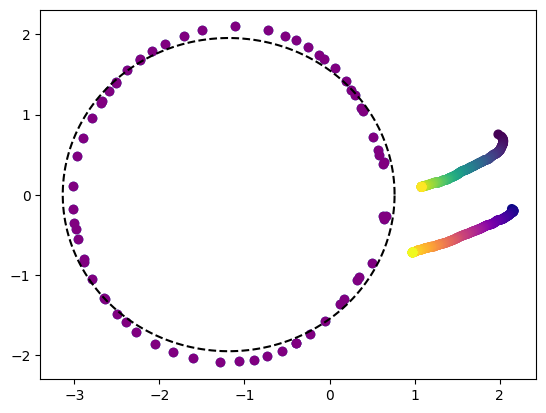

The positions are [ 1.02434  -0.629341  0.187179] and [1.076      0.208702   0.00428246]
The radius is 1.943888106799314 centered at (-1.194741275844791,-0.07967028584529476)
The final angle is 0.3772501473153399
THe lame distance is 0.7545002946306798
The original angle is 0.375


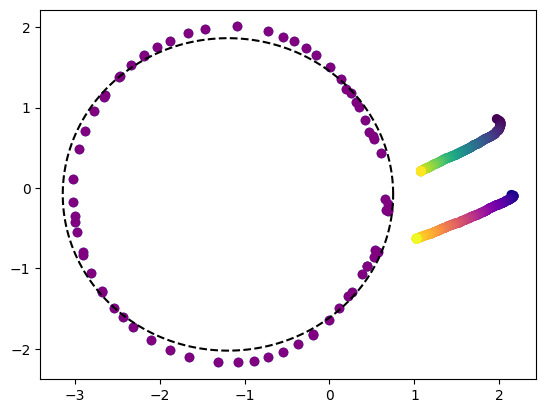

The positions are [ 1.05001    -0.725745   -0.00168085] and [1.17057   0.0339256 0.0211211]
The radius is 1.950523435566775 centered at (-1.1007333450434929,0.01590741816816935)
The final angle is 0.340142800865778
THe lame distance is 0.680285601731556
The original angle is 0.325


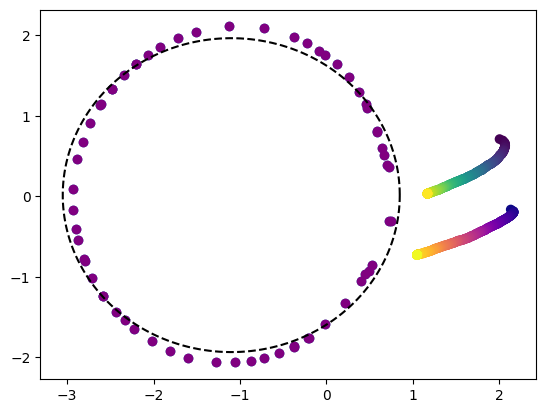

The positions are [ 1.05543  -0.516368  0.093937] and [ 1.01161    0.380963  -0.0140258]
The radius is 1.9469657681020824 centered at (-1.2070612474746358,-0.16668533874701508)
The final angle is 0.39804625174876007
THe lame distance is 0.7960925034975201
The original angle is 0.4


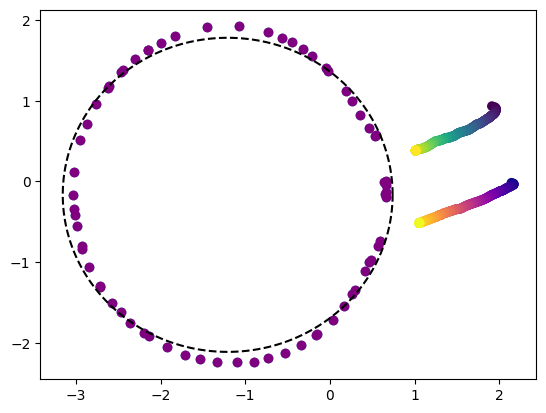

The positions are [ 0.98443  -0.558047  0.145672] and [0.954668  0.396276  0.0353299]
The radius is 1.9437558242828754 centered at (-1.2683506332534933,-0.16766893825457507)
The final angle is 0.422414467843554
THe lame distance is 0.844828935687108
The original angle is 0.425


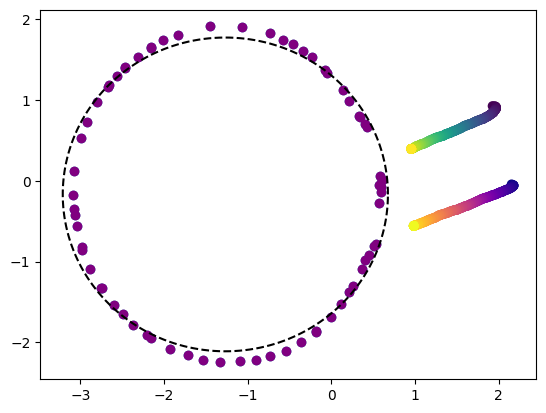

The positions are [ 1.02129   -0.371532  -0.0327886] and [ 0.763877    0.702496   -0.00448874]
The radius is 1.9528424901160037 centered at (-1.2820601168019183,-0.35086109170026497)
The final angle is 0.4845698737830131
THe lame distance is 0.9691397475660262
The original angle is 0.5


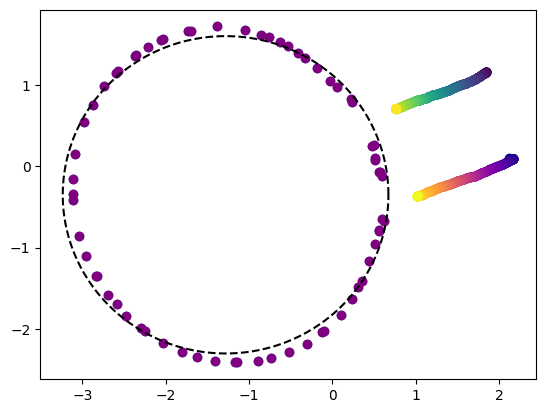

The positions are [ 1.02198  -0.483542 -0.0157  ] and [0.912028   0.515946   0.00386055]
The radius is 1.9529342799448361 centered at (-1.2609742427075268,-0.22662523204626217)
The final angle is 0.4414295693261652
THe lame distance is 0.8828591386523305
The original angle is 0.45000000000000007


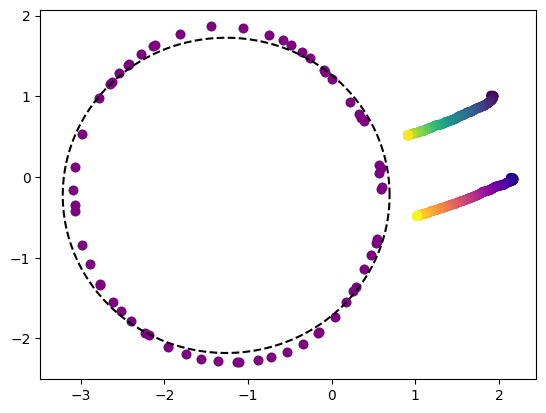

The positions are [ 1.0136    -0.466098   0.0580684] and [ 0.852253   0.563983  -0.0846047]
The radius is 1.9523287263287679 centered at (-1.286352234705863,-0.2730087277893739)
The final angle is 0.4609088283729531
THe lame distance is 0.9218176567459062
The original angle is 0.47500000000000003


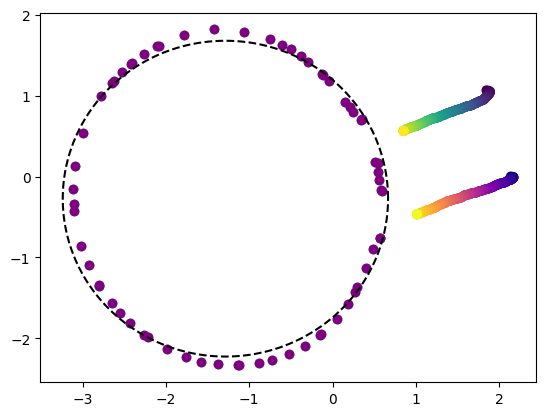

The positions are [ 0.976564   -0.35598     0.00245568] and [0.35593    1.00049    0.00937735]
The radius is 1.9473647249645605 centered at (-1.334352537172047,-0.59288769096095)
The final angle is 0.6537399715156864
THe lame distance is 1.3074799430313728
The original angle is 0.6999999999999998


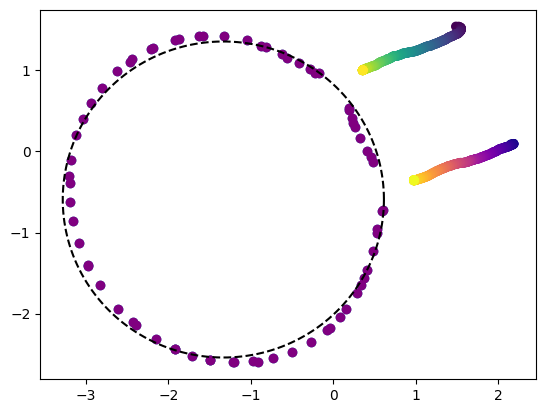

The positions are [ 0.989698  -0.42533    0.0100717] and [0.546737  0.907811  0.0101404]
The radius is 1.9551152192317918 centered at (-1.3224096105087735,-0.43709115392881426)
The final angle is 0.6186188658717574
THe lame distance is 1.2372377317435148
The original angle is 0.6499999999999999


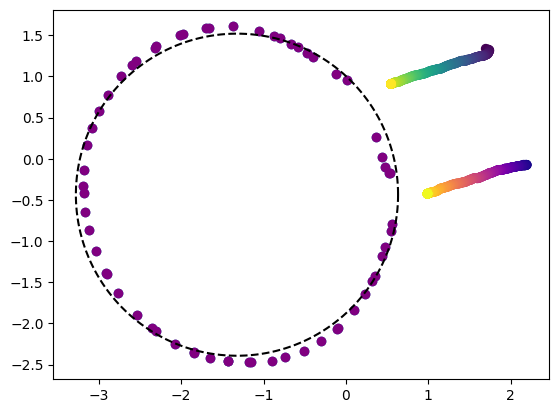

The positions are [ 1.02642   -0.335367   0.0255769] and [0.61112   0.895995  0.0798323]
The radius is 1.9554651209960137 centered at (-1.2797091694975642,-0.45137878115052427)
The final angle is 0.5691709764857495
THe lame distance is 1.138341952971499
The original angle is 0.6


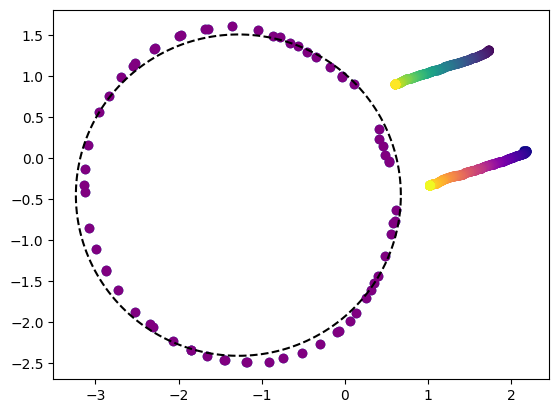

The positions are [ 0.995244  -0.406483   0.0625427] and [0.683954  0.765155  0.0501025]
The radius is 1.9540246113486173 centered at (-1.2998955311924207,-0.38737001556364653)
The final angle is 0.534486456936211
THe lame distance is 1.068972913872422
The original angle is 0.55


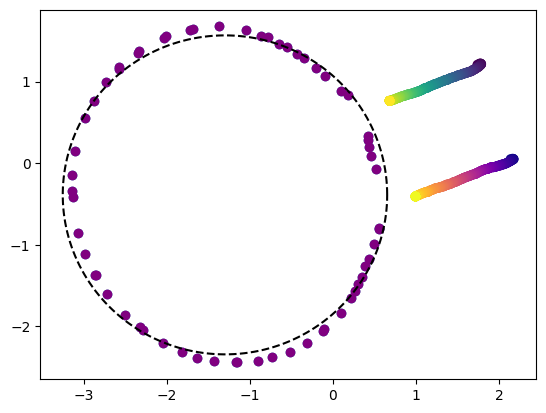

The positions are [ 1.02771   -0.307848   0.0522616] and [ 0.0810987  1.21219   -0.0832629]
The radius is 1.94342886068722 centered at (-1.2837854866795395,-0.711449973255351)
The final angle is 0.7828301558763037
THe lame distance is 1.5656603117526073
The original angle is 0.85


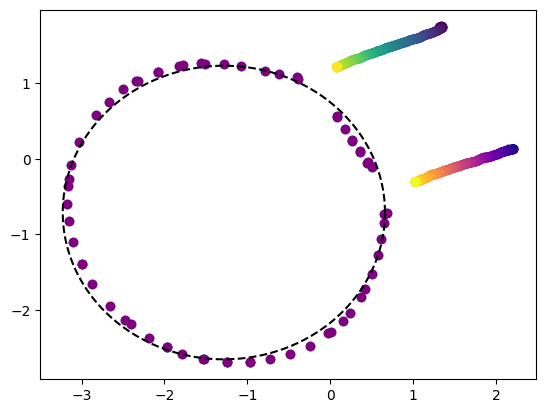

The positions are [ 1.01362   -0.288889   0.0215426] and [ 0.151011  1.1714   -0.121897]
The radius is 1.9450439766675736 centered at (-1.2852187090095093,-0.6824021986377823)
The final angle is 0.7443312395268801
THe lame distance is 1.4886624790537601
The original angle is 0.8


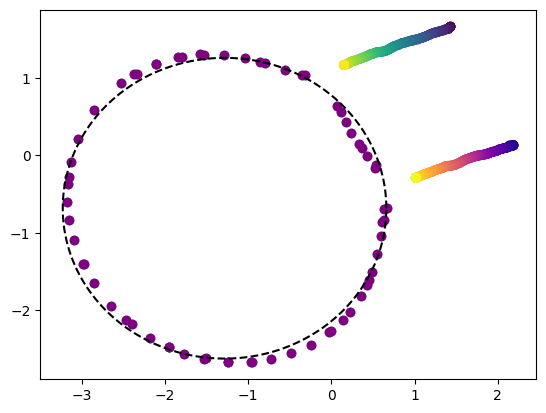

The positions are [ 0.987582  -0.355029   0.0726354] and [ 0.305589  1.08157  -0.169142]
The radius is 1.9445494899169782 centered at (-1.321812693913673,-0.5814694993477145)
The final angle is 0.7057009034908638
THe lame distance is 1.4114018069817276
The original angle is 0.75


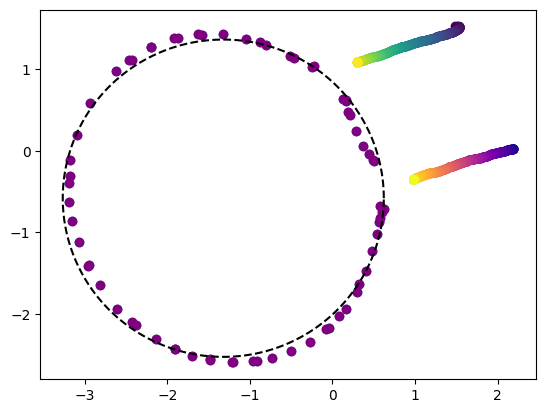

The positions are [ 1.03021    -0.350269   -0.00397726] and [0.0677091 1.27551   0.0804757]
The radius is 1.9449185733195429 centered at (-1.2996969058845897,-0.6566159721864736)
The final angle is 0.8247864204508951
THe lame distance is 1.6495728409017902
The original angle is 0.9


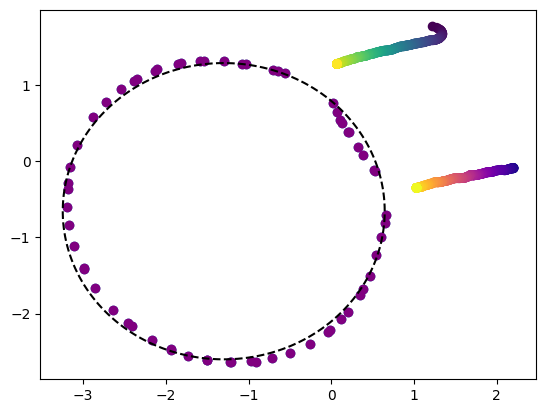

The positions are [ 1.06413   -0.234674   0.0595603] and [-0.153422   1.3386    -0.0704021]
The radius is 1.9462744400298004 centered at (-1.2095758885823054,-0.7919482155119476)
The final angle is 0.8718475815293791
THe lame distance is 1.7436951630587583
The original angle is 0.95


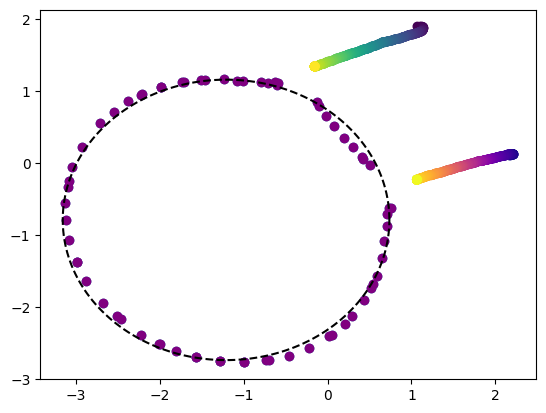

The positions are [ 1.06534   -0.314033   0.0884498] and [-0.161808   1.36328   -0.0701072]
The radius is 1.9412222359175402 centered at (-1.2387124770210731,-0.7690976991203977)
The final angle is 0.9104268609675492
THe lame distance is 1.8208537219350984
The original angle is 1.0


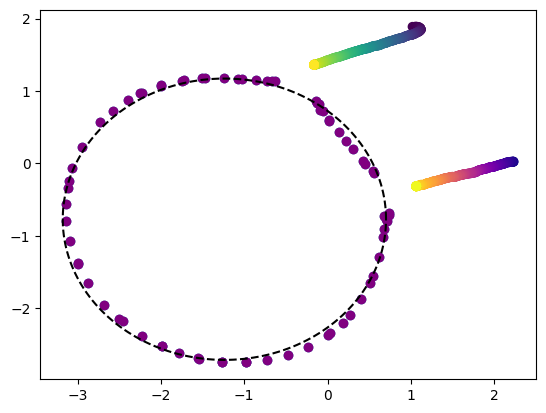

The positions are [ 1.12419   -0.213016   0.0446151] and [-0.433819   1.43361    0.0242407]
The radius is 1.9446055482697062 centered at (-1.1442901649564463,-0.8640308615618075)
The final angle is 0.9913549273894982
THe lame distance is 1.9827098547789963
The original angle is 1.1


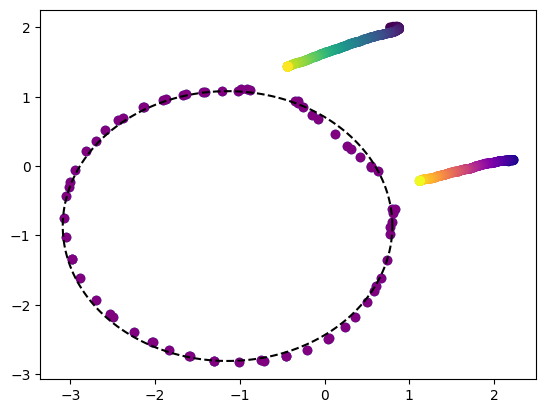

The positions are [ 1.10528   -0.176885  -0.0293701] and [-0.351618  1.41391   0.150373]
The radius is 1.941114576541061 centered at (-1.1491208674449933,-0.8395423796276055)
The final angle is 0.9472104540782793
THe lame distance is 1.8944209081565586
The original angle is 1.05


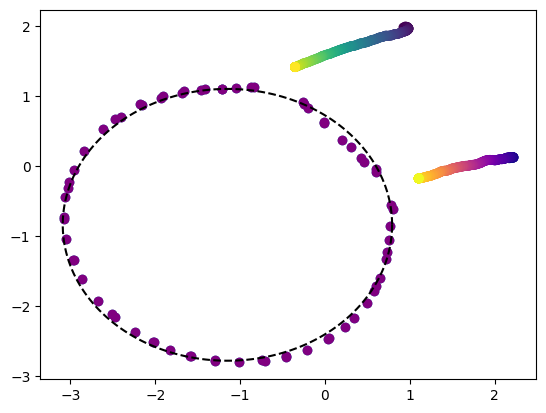

The positions are [ 1.18322   -0.170044  -0.0130136] and [-0.60316    1.48647    0.0138132]
The radius is 1.9453894251555468 centered at (-1.0625060003947921,-0.8887349505630904)
The final angle is 1.0700890148331372
THe lame distance is 2.1401780296662745
The original angle is 1.2


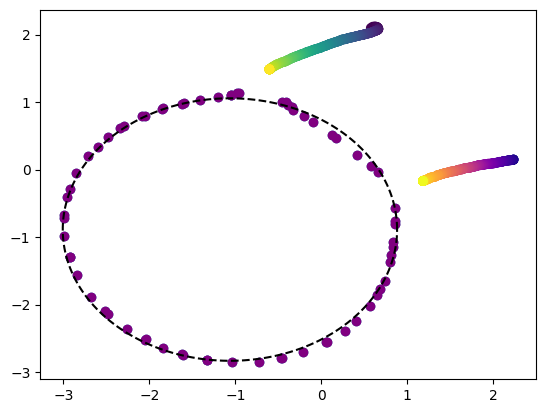

The positions are [ 1.2565    -0.122973  -0.0416198] and [-0.955793   1.55574   -0.0108178]
The radius is 1.9472216001859364 centered at (-0.9758719906493218,-0.9076359850022527)
The final angle is 1.2246184525885613
THe lame distance is 2.4492369051771226
The original angle is 1.4


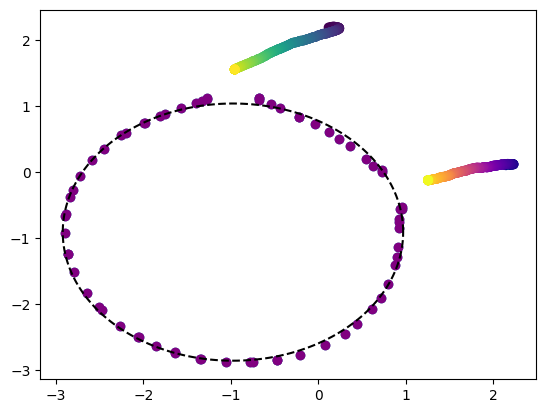

The positions are [ 1.19114   -0.16735    0.0289473] and [-0.811508   1.50937    0.0257746]
The radius is 1.9423195744035302 centered at (-1.0490265607551283,-0.926652685065065)
The final angle is 1.1467220909409583
THe lame distance is 2.2934441818819167
The original angle is 1.3


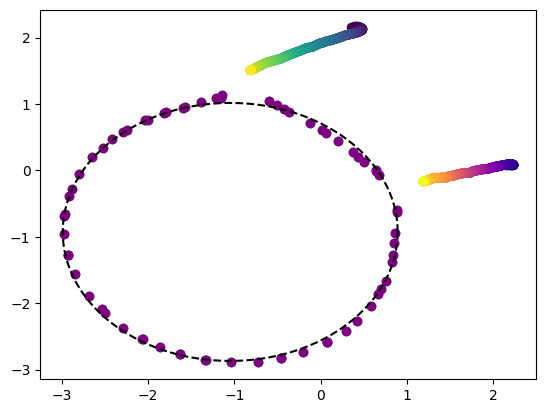

The positions are [ 1.35369   -0.103982  -0.0380613] and [-1.22001    1.6134     0.0168986]
The radius is 1.9470546910290139 centered at (-0.8770540381172424,-0.8781011442899076)
The final angle is 1.3737078162284202
THe lame distance is 2.7474156324568404
The original angle is 1.6


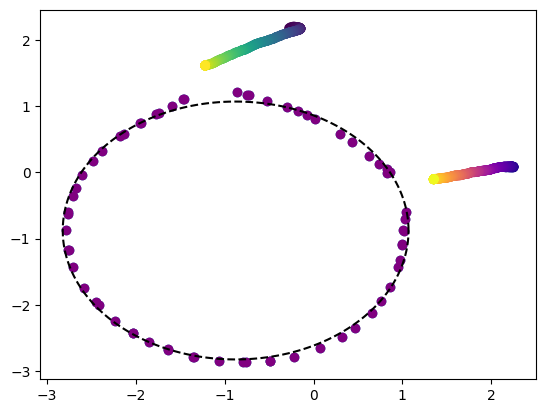

The positions are [ 1.3139    -0.12448    0.0416086] and [-1.0716    1.59214  -0.058258]
The radius is 1.9474474246278533 centered at (-0.9246097853470199,-0.883999595390691)
The final angle is 1.3035278081819286
THe lame distance is 2.607055616363857
The original angle is 1.5


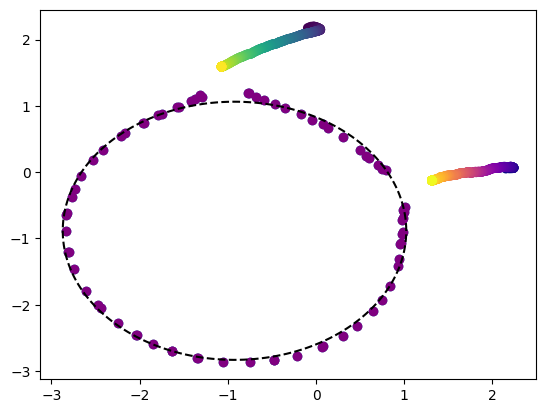

The positions are [1.44509    0.00268761 0.102862  ] and [-1.55699  1.52786 -0.14859]
The radius is 1.9579162755945783 centered at (-0.75421668819437,-0.8573336833605003)
The final angle is 1.5253894890762905
THe lame distance is 3.050778978152581
The original angle is 1.8


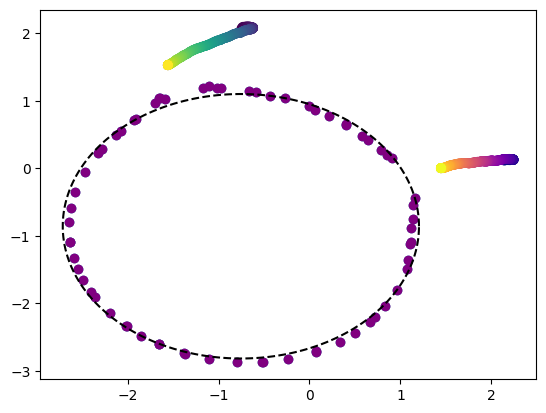

The positions are [ 1.42933   -0.0806957  0.0300505] and [-1.33233    1.59395    0.0800345]
The radius is 1.9525299147966646 centered at (-0.8033976612474353,-0.8532720261723901)
The final angle is 1.4501920978495866
THe lame distance is 2.900384195699173
The original angle is 1.7


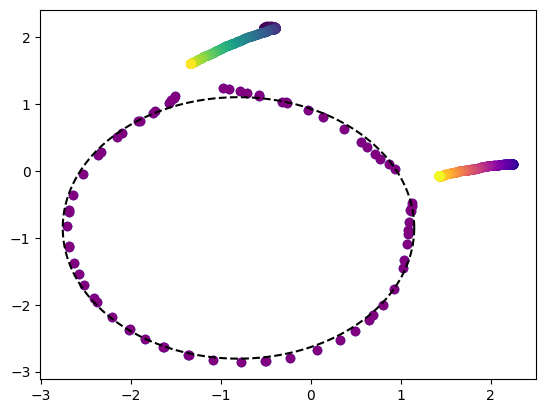

The positions are [1.47591    0.00272186 0.0145644 ] and [-1.69238   1.49092   0.021253]
The radius is 1.9568524941817778 centered at (-0.7084240237565601,-0.841796171380913)
The final angle is 1.6009822242466916
THe lame distance is 3.201964448493383
The original angle is 1.9


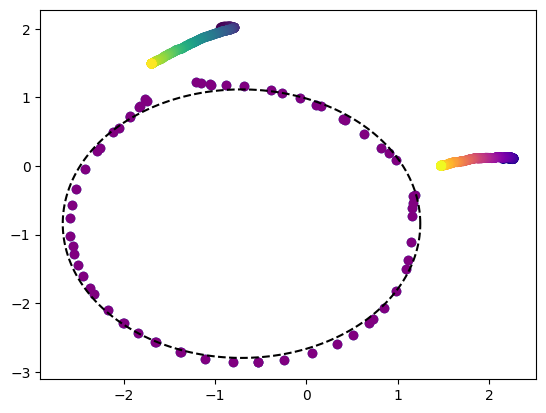

The positions are [ 1.63909   -0.0459514  0.0838246] and [-1.7983     1.39464   -0.0437627]
The radius is 1.952083860251265 centered at (-0.5844038449856426,-0.8117698968162144)
The final angle is 1.7425645498937568
THe lame distance is 3.4851290997875135
The original angle is 2.1


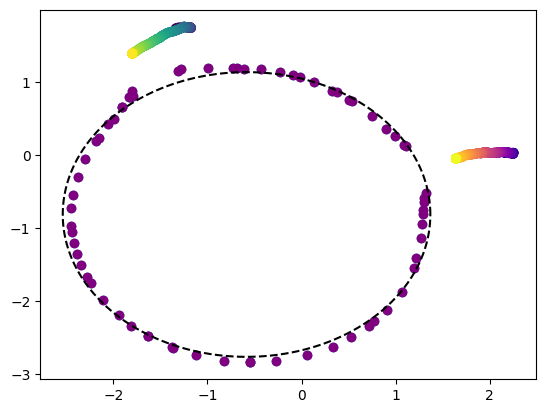

The positions are [ 1.51177   -0.0119266  0.0796191] and [-1.8009      1.46013     0.00528626]
The radius is 1.9584209978146183 centered at (-0.6945033217625262,-0.8193242858486389)
The final angle is 1.6717308319508042
THe lame distance is 3.3434616639016084
The original angle is 2.0


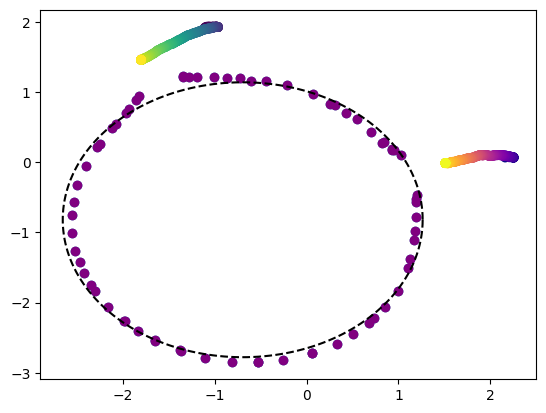

The positions are [ 1.59957    0.0470692 -0.0198358] and [-1.99908e+00  1.38339e+00  1.32131e-03]
The radius is 1.959285715322393 centered at (-0.616459349024497,-0.7344578497185039)
The final angle is 1.810111417441148
THe lame distance is 3.620222834882296
The original angle is 2.2


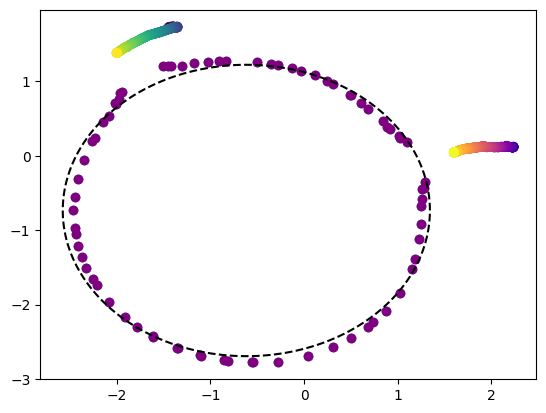

The positions are [ 1.73779   0.126855 -0.019149] and [-2.1481     1.12178    0.0276493]
The radius is 1.9599368819038472 centered at (-0.4562402799848679,-0.7171151690333102)
The final angle is 1.9474154883615136
THe lame distance is 3.894830976723027
The original angle is 2.4


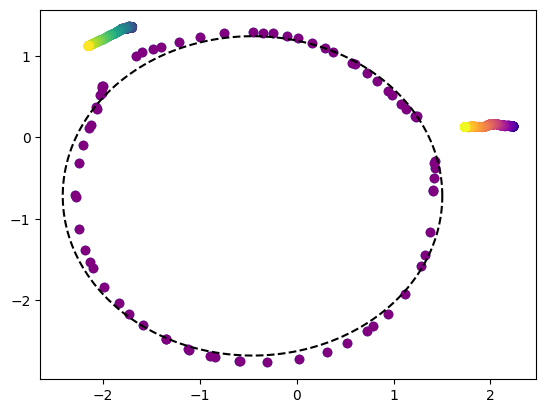

The positions are [ 1.79408   -0.0121552  0.15928  ] and [-2.13999   1.15284  -0.027222]
The radius is 1.9544539324158845 centered at (-0.44026995237846833,-0.6492984576818536)
The final angle is 2.0487716039920683
THe lame distance is 4.0975432079841365
The original angle is 2.5


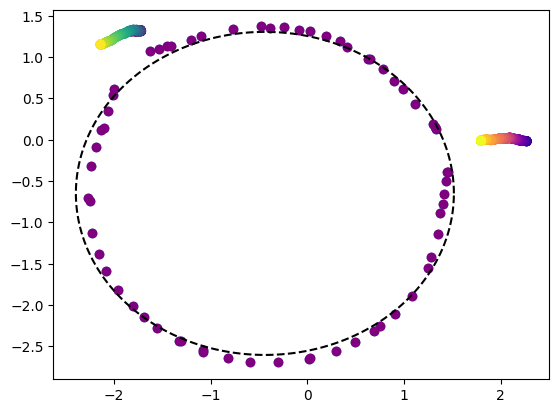

The positions are [1.68      0.0884208 0.0475975] and [-2.08693    1.20257   -0.0318741]
The radius is 1.9585846454622744 centered at (-0.5110410132500011,-0.7546484853077249)
The final angle is 1.8815411681271885
THe lame distance is 3.763082336254377
The original angle is 2.3


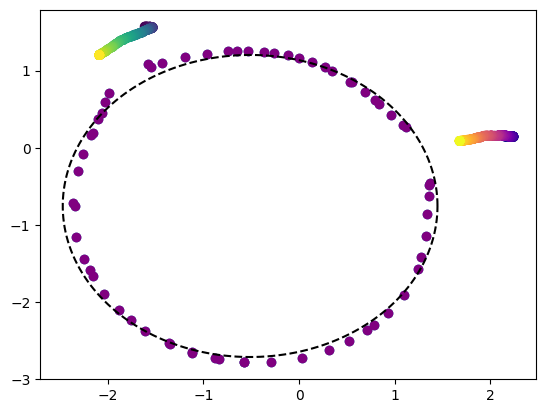

The positions are [1.85765   0.0695121 0.0154566] and [-2.21191    0.950434  -0.0438747]
The radius is 1.9489904793484707 centered at (-0.3574283595105988,-0.6263273619961813)
The final angle is 2.13260660363912
THe lame distance is 4.26521320727824
The original angle is 2.6


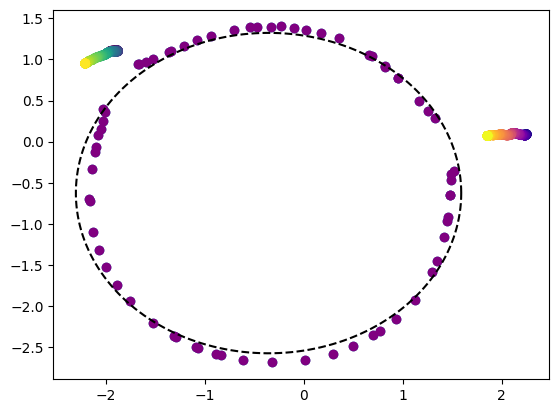

The positions are [ 1.93894    0.0897301 -0.0612572] and [-2.2326     0.821104  -0.0218509]
The radius is 1.94986926598892 centered at (-0.2793397034960647,-0.5581713347642089)
The final angle is 2.241966818888969
THe lame distance is 4.483933637777938
The original angle is 2.7


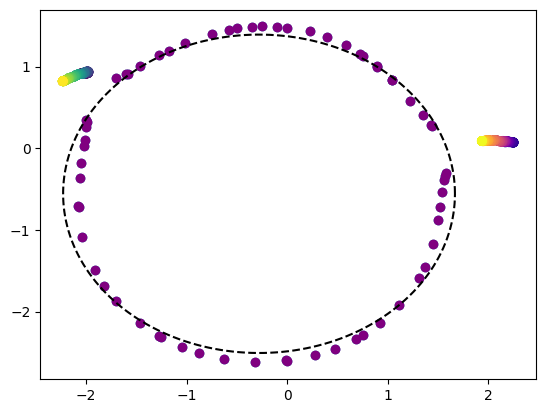

The positions are [2.04602   0.0843829 0.0271325] and [-2.21637    0.591637  -0.0322607]
The radius is 1.9341511595911671 centered at (-0.1596089960612532,-0.4522065666954042)
The final angle is 2.4333622526178322
THe lame distance is 4.8667245052356645
The original angle is 2.8


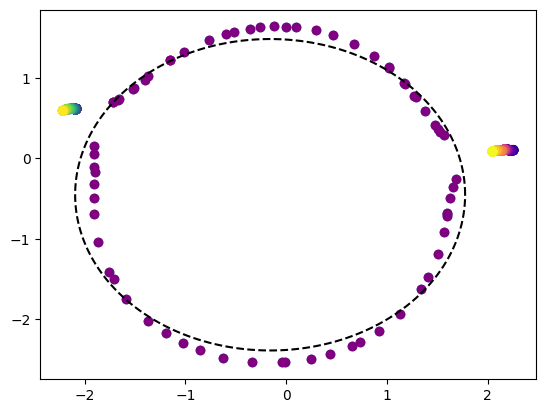

The positions are [ 2.09318   -0.0629122  0.0721892] and [-2.20276    0.547093  -0.0666703]
The radius is 1.9224581040395843 centered at (-0.10763354364121674,-0.2957899516623172)
The final angle is 2.6539079117694073
THe lame distance is 5.307815823538815
The original angle is 2.9


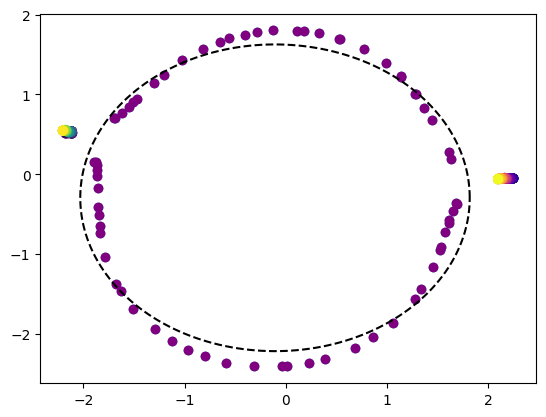

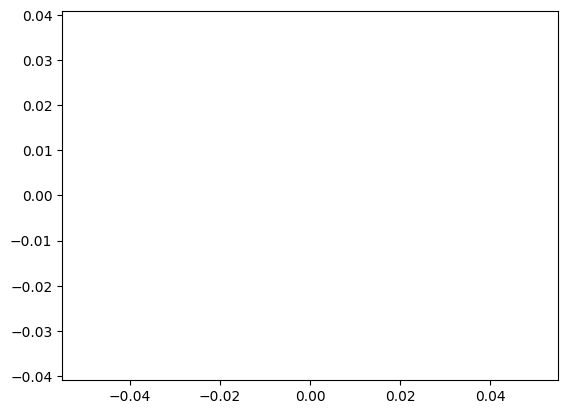

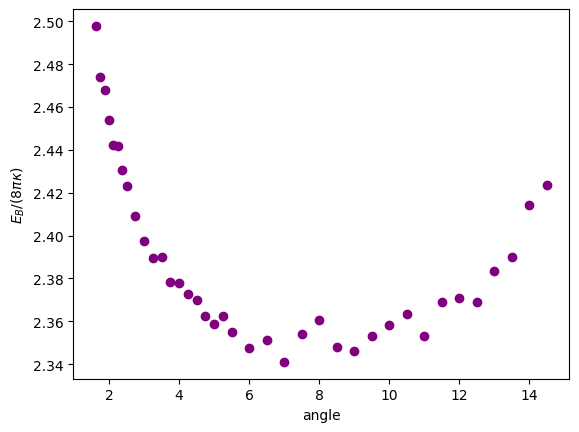

In [192]:
Bead_DISTANCES2 = []
Thetas2 = []
Geo_dist = []
# fig, ax = plt.subplots(layout='constrained')

# fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
            #  ax=ax, orientation='vertical', label='Angle (radians)')
Bendings_2 = []
for i in range(1,39):
    E_Bead_1 = []
    E_Bead_2 = []
    E_Bend = []
    E_Sur = []
    # i = 5
    # Simulation = Sims_dir+"Bending_20.0000_Volume_constraint_10000.0000_33.3189_Edge_reg_0.0000_1.0000_Bead_radius_0.2000_Frenkel_Normal_nopush_str_700.0000_Bead_radius_0.2000_Frenkel_Normal_nopush_str_700.0000_Bonds_Harmonic_400.0000_Harmonic_400.0000_Switch_Newton_Nsim_3"+"/"
    Simulation = Sims_dir+"{}".format(i)+"/"


    Output_dir = Simulation+'Output_data.txt'
    # print(Output_dir)
    Data_sim = json.load(open(Simulation+"Input_file.json"))

    Pos2 = Data_sim['Beads'][1]['Pos']
    # print("The bead is initially at position {}".format(Data_sim["Beads"][1]["Pos"]))

    angle = np.arctan2(Pos2[1],Pos2[0])
    Thetas2.append(angle)
    L0 = Data_sim['Beads'][0]['bonds_constants'][0][1]
    # print("THe angle is {}".format(angle))
    # print("THe length is {}".format(L0))

    Sim_data = np.loadtxt(Output_dir,skiprows=1,usecols=[3,4,5,6,7])



    E_Bend = Sim_data[:,0]
    Bendings_2.append(E_Bend[-1])
    
    E_Vol = Sim_data[:,1]
    E_Bead_1 = Sim_data[:,2]
    E_Bead_2 = Sim_data[:,3]

    E_Tot = Sim_data[:,4]

    Bead_1_traj = np.loadtxt(Simulation+"Bead_0_data.txt",skiprows=1)
    Bead_2_traj = np.loadtxt(Simulation+"Bead_1_data.txt",skiprows=1)
    Bead_1_pos = Bead_1_traj[-1,0:3]
    Bead_2_pos = Bead_2_traj[-1,0:3]
    time = np.arange(len(Bead_1_traj[:,0]))
    plt.scatter(Bead_1_traj[:,0],Bead_1_traj[:,1],c=time,cmap='plasma')
    plt.scatter(Bead_2_traj[:,0],Bead_2_traj[:,1],c=time,cmap='viridis')
    Geo_dist.append(Fitting_circle_bead_distance(Simulation))
    print("The original angle is {}".format(angle))
    # plt.plot(2*x,2*y,color='black',ls='dashed')
    # plt.xlim(0,2)
    # plt.ylim(0,2)
    # plt.title("theta={}".format(angle))
    # plt.xlim(1,2)
    # plt.ylim(-0.5,0.5)
    plt.show()


    Bead_distance = []
    for j in range(len(Bead_1_traj)):
        Bead_1_pos = Bead_1_traj[j,0:3]
        Bead_2_pos = Bead_2_traj[j,0:3]
        r = np.linalg.norm( Bead_1_pos-Bead_2_pos ) - L0
        Bead_distance.append(r)
        

    # ax.plot(Bead_distance,label='{}'.format(angle),color=cmap(norm(angle)))
    Bead_DISTANCES2.append(Bead_distance[-1])
# plt.legend()
# ax.axhline(0.0,ls='dashed',color='black')
plt.axis('equal')
# plt.xlim(-2,2.5)
# plt.ylim(-2,2.5)
# plt.axis('equal')
plt.show()

# ax.cla()

plt.scatter(np.array(Thetas2)*2.0/(0.4),np.array(Bendings_2)/(4*np.pi*20),color='purple')
plt.ylabel(r'$E_B/(8\pi \kappa)$')
plt.xlabel(r'angle')
# plt.scatter(Thetas,np.array(Bendings)/(4*np.pi*20))
# plt.ylabel('E_B/(8*PiKB)')
plt.show()

# plt.ylim(-0.05,0.05)

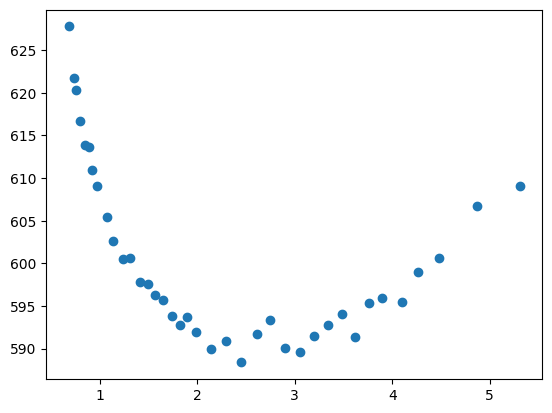

In [193]:
plt.scatter(np.array(Geo_dist),Bendings_2)

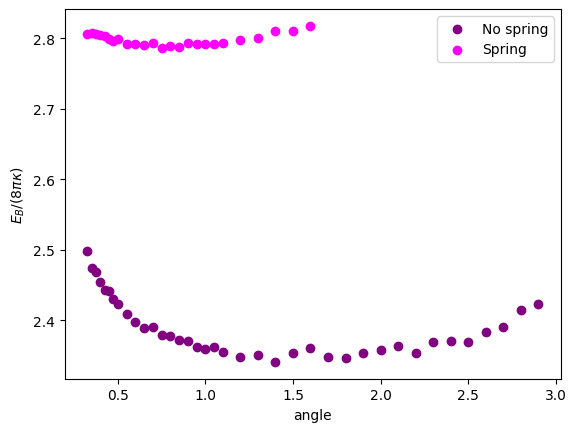

In [194]:
plt.scatter(Thetas2,np.array(Bendings_2)/(4*np.pi*20),color='purple',label='No spring')
plt.scatter(Thetas,np.array(Bendings)/(4*np.pi*20),color='magenta',label='Spring')
plt.ylabel(r'$E_B/(8\pi \kappa)$')
plt.xlabel(r'angle')
plt.legend()

plt.show()

In [195]:
# Results_dir = current_dir+'/../Results/'
Sims_dir = Results_dir + 'Two_beads_right_spring_outside_outside/'


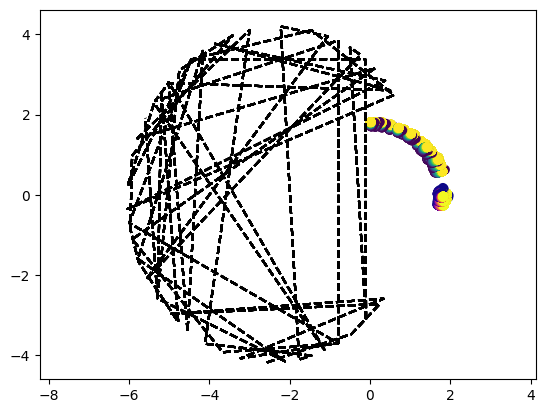

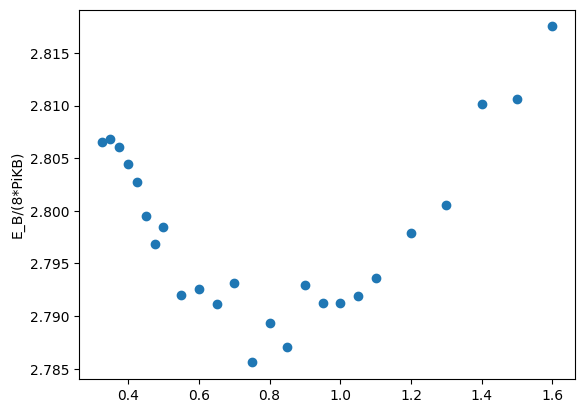

In [196]:
Bead_DISTANCES = []
Thetas = []

# fig, ax = plt.subplots(layout='constrained')

# fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
            #  ax=ax, orientation='vertical', label='Angle (radians)')
Bendings = []
for i in range(1,26):
    E_Bead_1 = []
    E_Bead_2 = []
    E_Bend = []
    E_Sur = []
    # i = 5
    # Simulation = Sims_dir+"Bending_20.0000_Volume_constraint_10000.0000_33.3189_Edge_reg_0.0000_1.0000_Bead_radius_0.2000_Frenkel_Normal_nopush_str_700.0000_Bead_radius_0.2000_Frenkel_Normal_nopush_str_700.0000_Bonds_Harmonic_400.0000_Harmonic_400.0000_Switch_Newton_Nsim_3"+"/"
    Simulation = Sims_dir+"{}".format(i)+"/"


    Output_dir = Simulation+'Output_data.txt'
    # print(Output_dir)
    Data_sim = json.load(open(Simulation+"Input_file.json"))

    Pos2 = Data_sim['Beads'][1]['Pos']
    # print("The bead is initially at position {}".format(Data_sim["Beads"][1]["Pos"]))

    angle = np.arctan2(Pos2[1],Pos2[0])
    Thetas.append(angle)
    L0 = Data_sim['Beads'][0]['bonds_constants'][0][1]
    # print("THe angle is {}".format(angle))
    # print("THe length is {}".format(L0))

    Sim_data = np.loadtxt(Output_dir,skiprows=1,usecols=[3,4,5,6,7])



    E_Bend = Sim_data[:,0]
    Bendings.append(E_Bend[-1])
    E_Vol = Sim_data[:,1]
    E_Bead_1 = Sim_data[:,2]
    E_Bead_2 = Sim_data[:,3]

    E_Tot = Sim_data[:,4]

    Bead_1_traj = np.loadtxt(Simulation+"Bead_0_data.txt",skiprows=1)
    Bead_2_traj = np.loadtxt(Simulation+"Bead_1_data.txt",skiprows=1)
    Bead_1_pos = Bead_1_traj[-1,0:3]
    Bead_2_pos = Bead_2_traj[-1,0:3]
    time = np.arange(len(Bead_1_traj[:,0]))
    plt.scatter(Bead_1_traj[:,0],Bead_1_traj[:,1],c=time,cmap='plasma')
    plt.scatter(Bead_2_traj[:,0],Bead_2_traj[:,1],c=time,cmap='viridis')
    plt.plot(2*x,2*y,color='black',ls='dashed')
    plt.xlim(0,2)
    plt.ylim(0,2)
    # plt.title("theta={}".format(angle))
    # plt.xlim(1,2)
    # plt.ylim(-0.5,0.5)
    # plt.show()


    Bead_distance = []
    for j in range(len(Bead_1_traj)):
        Bead_1_pos = Bead_1_traj[j,0:3]
        Bead_2_pos = Bead_2_traj[j,0:3]
        r = np.linalg.norm( Bead_1_pos-Bead_2_pos ) - L0
        Bead_distance.append(r)
        

    # ax.plot(Bead_distance,label='{}'.format(angle),color=cmap(norm(angle)))
    Bead_DISTANCES.append(Bead_distance[-1])
# plt.legend()
# ax.axhline(0.0,ls='dashed',color='black')
plt.axis('equal')
plt.show()

# ax.cla()


plt.scatter(Thetas,np.array(Bendings)/(4*np.pi*20))
plt.ylabel('E_B/(8*PiKB)')
plt.show()

# plt.ylim(-0.05,0.05)

In [197]:
# Results_dir = current_dir+'/../Results/'
Sims_dir = Results_dir + 'Two_beads_no_spring_outside_outside/'

In [198]:
cmap = mpl.cm.plasma
norm = mpl.colors.Normalize(vmin=0.325, vmax=1.6)

The positions are [ 1.9216    -0.0455865  0.0805189] and [ 1.80824    0.651784  -0.0336014]
The radius is 2.0349647209188233 centered at (0.2731896702635273,0.04181637339875253)
The final angle is 0.4365709753418966
THe lame distance is 0.8731419506837932
The original angle is 0.37500000000000006


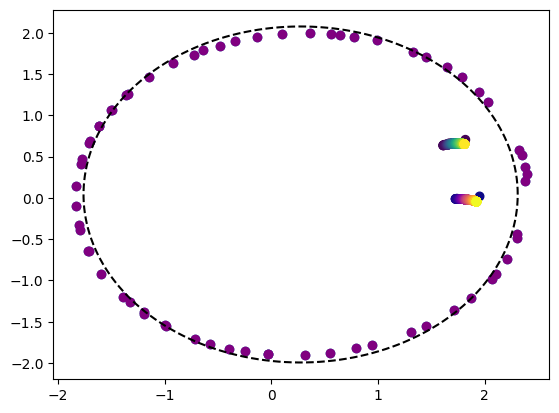

The positions are [ 1.89157   -0.271693  -0.0139389] and [1.83141  0.287788 0.247357]
The radius is 2.035469992245787 centered at (0.2630173314422218,0.0001310679455810602)
The final angle is 0.3817091741941726
THe lame distance is 0.7634183483883452
The original angle is 0.325


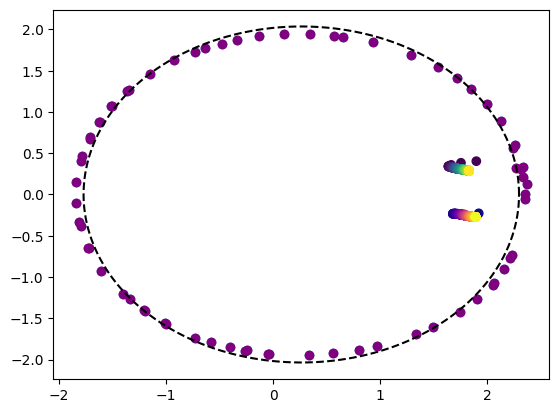

The positions are [ 1.92442   -0.0982319 -0.191757 ] and [ 1.83304    0.537178  -0.0211483]
The radius is 2.0341598851846383 centered at (0.27602084790365816,0.026248348960066704)
The final angle is 0.4046711526840264
THe lame distance is 0.8093423053680529
The original angle is 0.35000000000000003


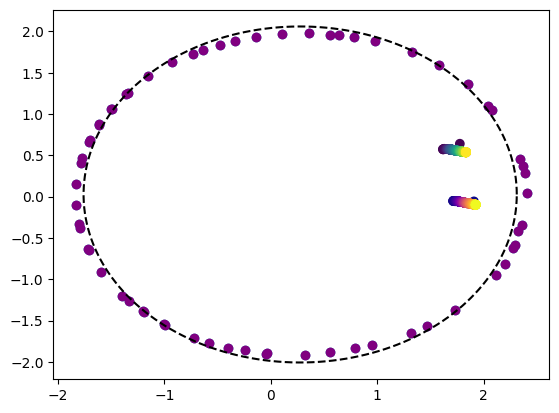

The positions are [ 1.92633  -0.152285  0.104534] and [1.80335   0.597708  0.0697173]
The radius is 2.0289270011138174 centered at (0.2699980974383539,0.02779856264955887)
The final angle is 0.4639238109635889
THe lame distance is 0.9278476219271778
The original angle is 0.4


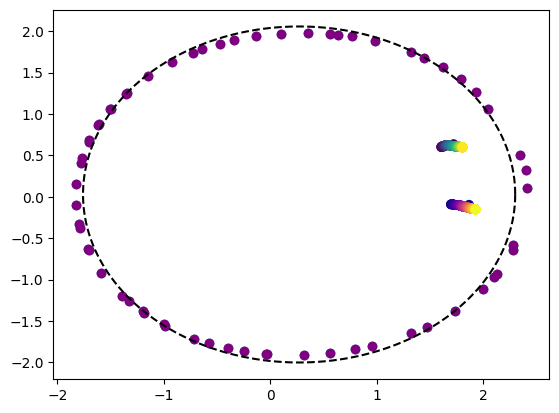

The positions are [ 1.90292   -0.185019  -0.0427922] and [1.80333   0.609092  0.0257143]
The radius is 2.031621048633517 centered at (0.26827417055861613,0.03428734293314409)
The final angle is 0.4933720602864964
THe lame distance is 0.9867441205729928
The original angle is 0.425


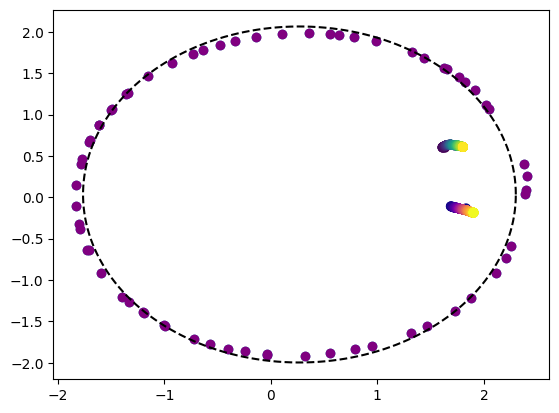

The positions are [ 1.92391    -0.00341174  0.113958  ] and [ 1.72201    0.849344  -0.0329202]
The radius is 2.0348714422399556 centered at (0.28924795926147756,0.06340952412285983)
The final angle is 0.5495946480529833
THe lame distance is 1.0991892961059666
The original angle is 0.475


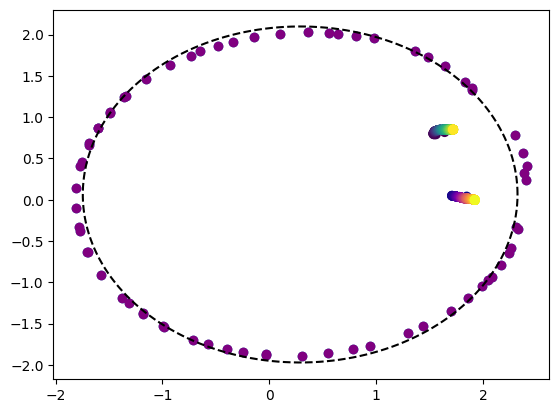

The positions are [ 1.87594   -0.341641   0.0479652] and [ 1.82196   0.491172 -0.103415]
The radius is 2.0335637419801125 centered at (0.2710362605434782,0.010955617969730835)
The final angle is 0.5245422289575371
THe lame distance is 1.0490844579150742
The original angle is 0.45000000000000007


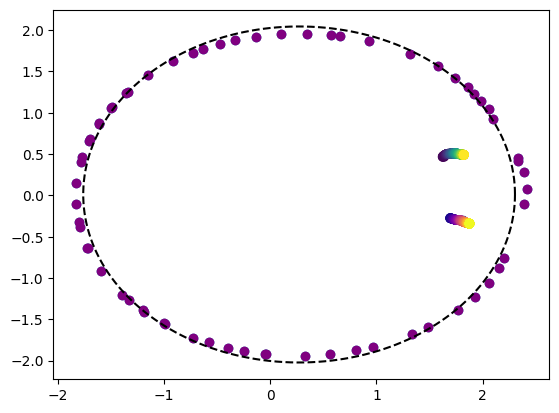

The positions are [ 1.92408   -0.0546072  0.128814 ] and [ 1.71789    0.838738  -0.0365975]
The radius is 2.0399705531513352 centered at (0.29796139594163773,0.05910310510802865)
The final angle is 0.5803947345060549
THe lame distance is 1.1607894690121099
The original angle is 0.49999999999999994


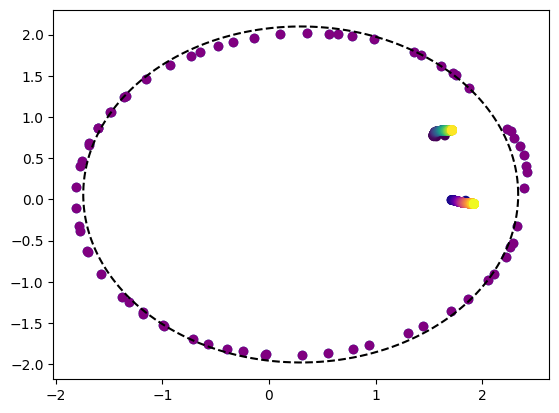

The positions are [ 1.91012    -0.00918285 -0.0480357 ] and [ 1.58685  1.0416  -0.11084]
The radius is 2.035092631167654 centered at (0.2846519133740955,0.08483705883330726)
The final angle is 0.6916246882711942
THe lame distance is 1.3832493765423883
The original angle is 0.6


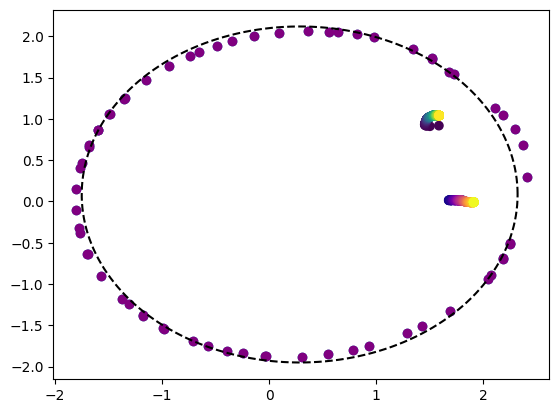

The positions are [ 1.91179    0.0918587 -0.118295 ] and [ 1.47812   1.18157  -0.313939]
The radius is 2.0412373759396423 centered at (0.3042638001135521,0.11307605486702532)
The final angle is 0.7539499182641873
THe lame distance is 1.5078998365283747
The original angle is 0.65


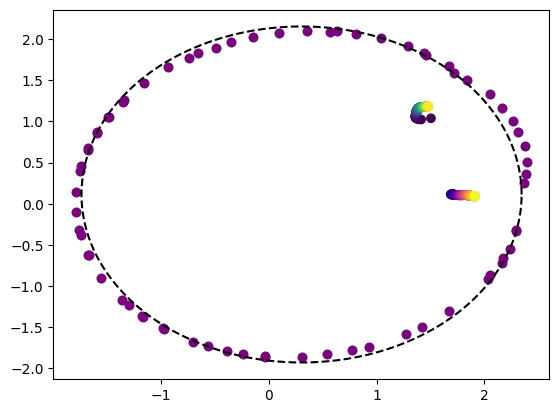

The positions are [ 1.9113    -0.0885589  0.0441306] and [ 1.70224   0.836189 -0.318438]
The radius is 2.04025877839019 centered at (0.3018952234545951,0.0653370533982773)
The final angle is 0.6357844671792438
THe lame distance is 1.2715689343584875
The original angle is 0.5500000000000002


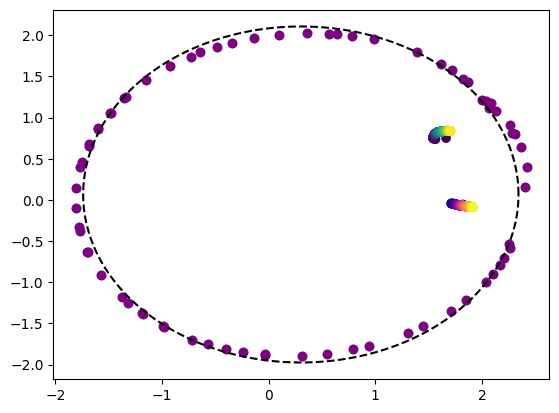

The positions are [ 1.8483   -0.203073 -0.177431] and [ 1.40529    1.24749   -0.0779232]
The radius is 2.0437040983830927 centered at (0.30558867597281086,0.09891305179220808)
The final angle is 0.998728298013913
THe lame distance is 1.997456596027826
The original angle is 0.85


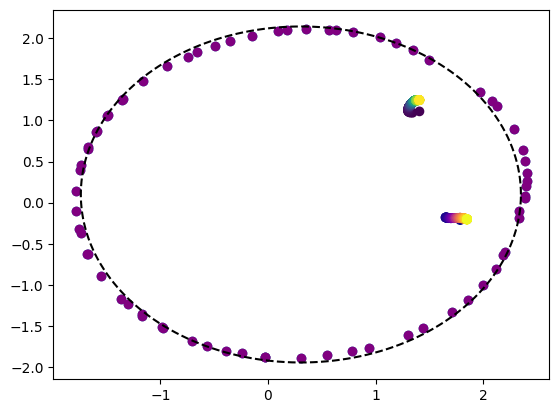

The positions are [1.86916   0.289907  0.0120886] and [ 1.29561   1.40703  -0.161515]
The radius is 2.041924372633096 centered at (0.2742855353769803,0.14710301765649497)
The final angle is 0.8061417734150053
THe lame distance is 1.6122835468300105
The original angle is 0.7


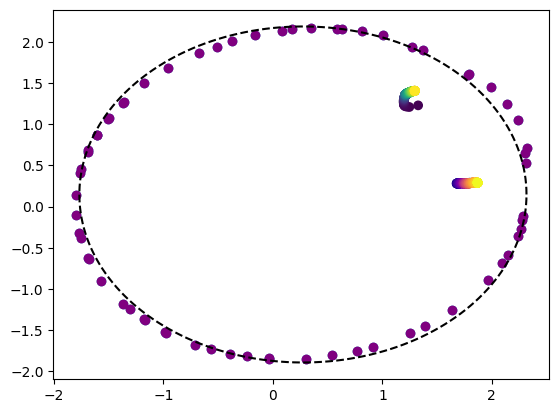

The positions are [ 1.86155   0.205008 -0.11942 ] and [1.22085   1.46425   0.0793722]
The radius is 2.0457343096417455 centered at (0.2808758432571319,0.1568383358239611)
The final angle is 0.9247444560848648
THe lame distance is 1.8494889121697295
The original angle is 0.8


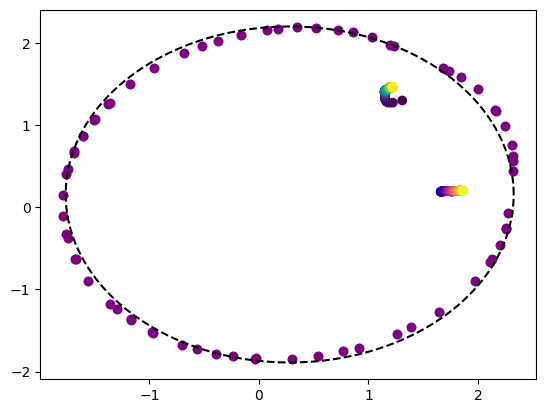

The positions are [1.87132  0.171703 0.055027] and [1.29789  1.37558  0.283498]
The radius is 2.045464931061949 centered at (0.28583186546418604,0.1454695521611814)
The final angle is 0.8714742693511
THe lame distance is 1.7429485387022
The original angle is 0.75


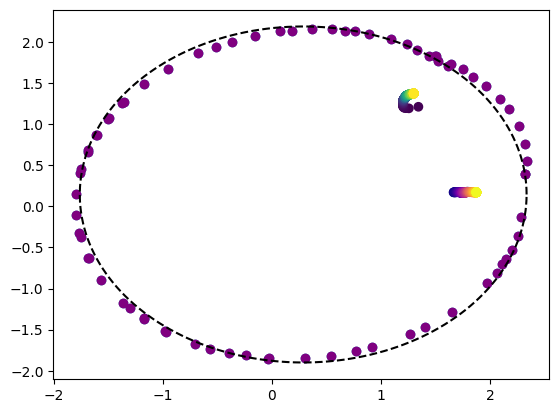

The positions are [ 1.84135  -0.230966  0.166767] and [ 1.3884    1.21551  -0.326243]
The radius is 2.0427123674748735 centered at (0.3044404699980097,0.09416211280674464)
The final angle is 1.0525120482342754
THe lame distance is 2.1050240964685507
The original angle is 0.9


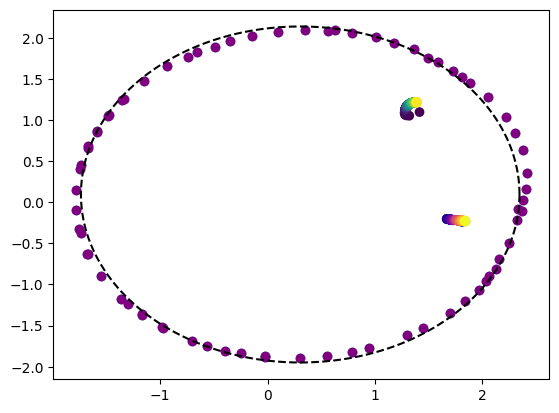

The positions are [1.85514   0.0435825 0.101014 ] and [ 1.10656    1.53105   -0.0728503]
The radius is 2.045639196684058 centered at (0.2899279263876008,0.15612773602621202)
The final angle is 1.11143463280578
THe lame distance is 2.22286926561156
The original angle is 0.95


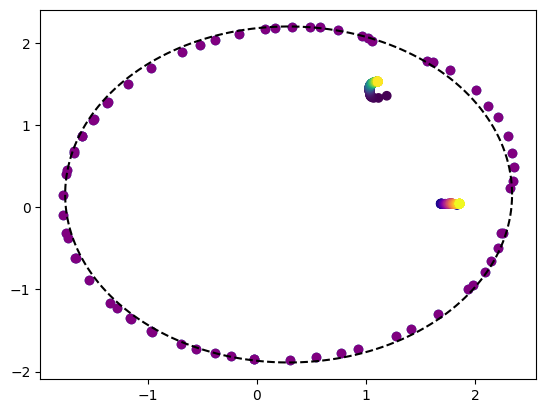

The positions are [1.82417  0.157538 0.117877] and [ 0.890119  1.69117  -0.192972]
The radius is 2.04929758035427 centered at (0.27250222356975556,0.20183465055760835)
The final angle is 1.2196178185874744
THe lame distance is 2.439235637174949
The original angle is 1.05


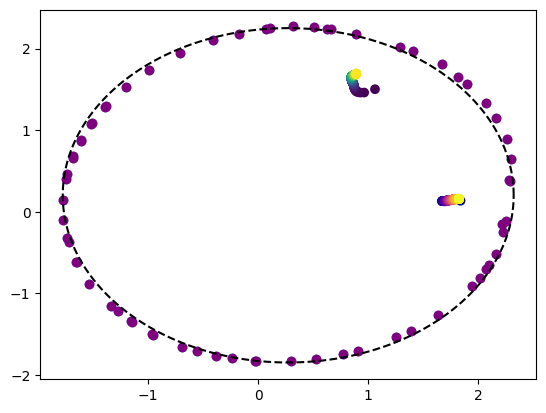

The positions are [ 1.83161e+00 -1.55782e-01  6.16905e-04] and [ 1.16208     1.46796    -0.00804606]
The radius is 2.04411474615533 centered at (0.29436821221424825,0.13465822324896895)
The final angle is 1.1806016635887338
THe lame distance is 2.3612033271774675
The original angle is 0.9999999999999999


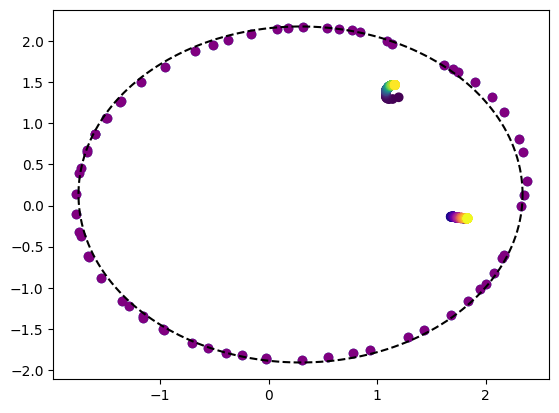

The positions are [1.77324   0.0069494 0.139583 ] and [ 0.53134   1.79867  -0.117811]
The radius is 2.055077902154194 centered at (0.23656985053677576,0.2043016716966774)
The final angle is 1.5225861767427273
THe lame distance is 3.0451723534854547
The original angle is 1.3


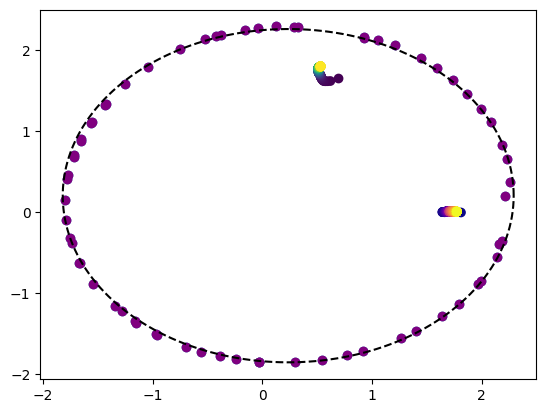

The positions are [ 1.75426    0.0442572 -0.137075 ] and [0.357371 1.87435  0.101526]
The radius is 2.0586357120684418 centered at (0.21270275567960445,0.22229706370218472)
The final angle is 1.6036549061532386
THe lame distance is 3.207309812306477
The original angle is 1.4


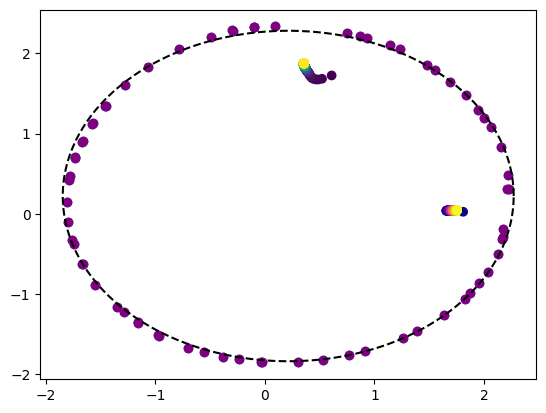

The positions are [ 1.80034    0.0165564 -0.142458 ] and [ 0.683556   1.7432    -0.0180406]
The radius is 2.0507775207049086 centered at (0.2567757652610856,0.19522244391336185)
The final angle is 1.4166331214968346
THe lame distance is 2.8332662429936692
The original angle is 1.2


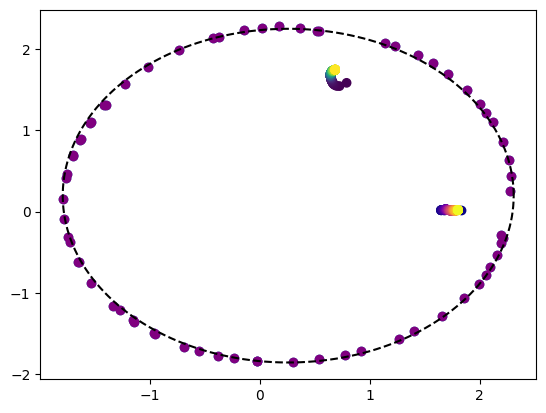

The positions are [1.80269  0.110635 0.165113] and [0.818824  1.72072   0.0026627]
The radius is 2.049111244359502 centered at (0.2567173966724914,0.19898576822993955)
The final angle is 1.275585563657794
THe lame distance is 2.551171127315588
The original angle is 1.1


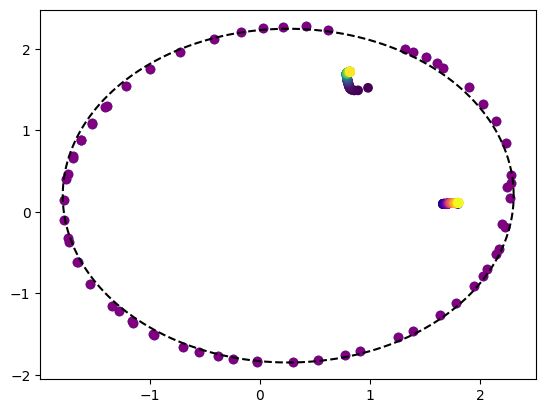

The positions are [ 1.74377    -0.192041    0.00207785] and [ 0.110569   1.82143   -0.0324405]
The radius is 2.0588444139216953 centered at (0.1923812115852337,0.18237028328888932)
The final angle is 1.8574491189141864
THe lame distance is 3.714898237828373
The original angle is 1.6


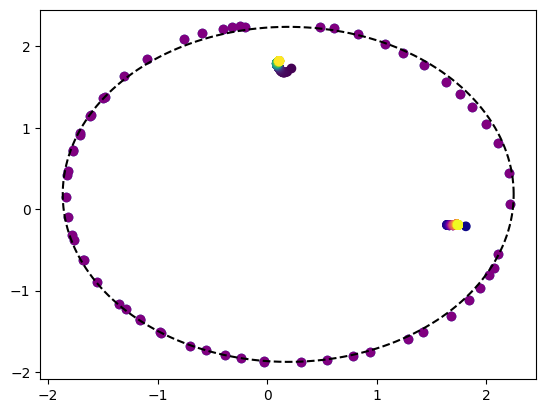

The positions are [ 1.72732  -0.29379   0.122776] and [0.436533 1.79542  0.216298]
The radius is 2.0574993858454405 centered at (0.21994290735396615,0.17447889495820068)
The final angle is 1.7268863328977393
THe lame distance is 3.4537726657954786
The original angle is 1.5


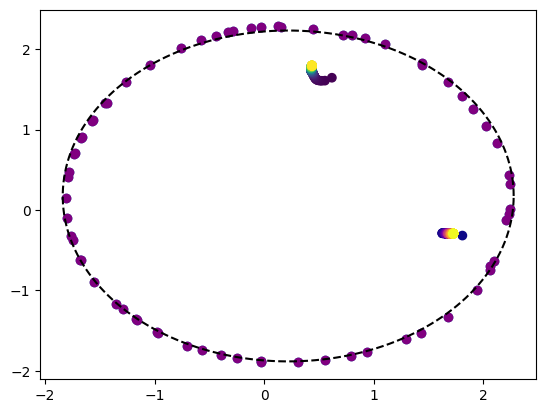

The positions are [ 1.74233   -0.0540332  0.150346 ] and [-0.182366   1.83383    0.0040569]
The radius is 2.060113668105359 centered at (0.15718928069766236,0.20442951576208868)
The final angle is 1.9359622117347266
THe lame distance is 3.871924423469453
The original angle is 1.7


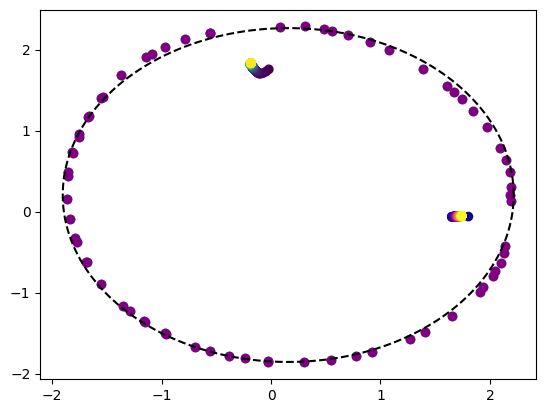

The positions are [ 1.73422   -0.0143328  0.0981249] and [-0.543714   1.79706    0.0940368]
The radius is 2.069753086846736 centered at (0.10821774423096792,0.19678731822722803)
The final angle is 2.0812001013439683
THe lame distance is 4.1624002026879365
The original angle is 1.9


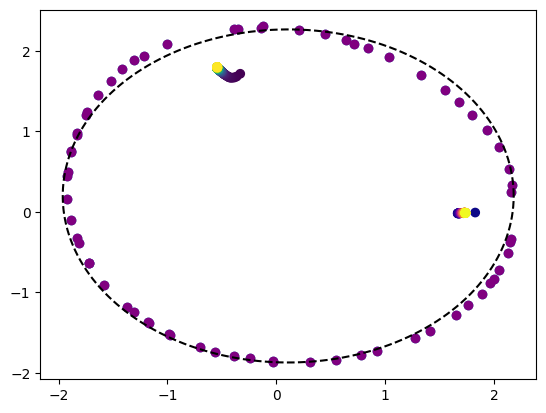

The positions are [ 1.71823   -0.297095   0.0306379] and [-0.578799    1.69384     0.00761978]
The radius is 2.0581610191609223 centered at (0.11549990909469406,0.15330692460828116)
The final angle is 2.2679190770285507
THe lame distance is 4.535838154057101
The original angle is 2.0


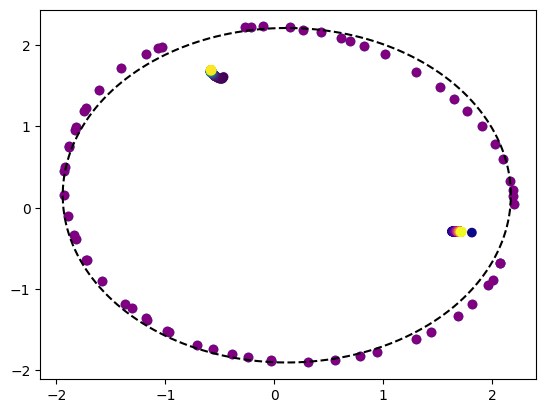

The positions are [ 1.71927   -0.107299   0.0233059] and [-0.841556  1.6555    0.153982]
The radius is 2.0621120821120407 centered at (0.05774792001498632,0.17120959135107863)
The final angle is 2.27655457754322
THe lame distance is 4.55310915508644
The original angle is 2.1


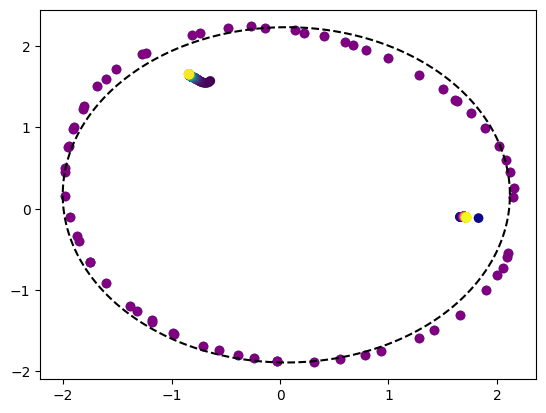

The positions are [ 1.72779   -0.0436645  0.130409 ] and [-0.391311   1.79474   -0.0449341]
The radius is 2.06142891385773 centered at (0.12934627570487367,0.19307783766260772)
The final angle is 2.0327421702788024
THe lame distance is 4.065484340557605
The original angle is 1.8


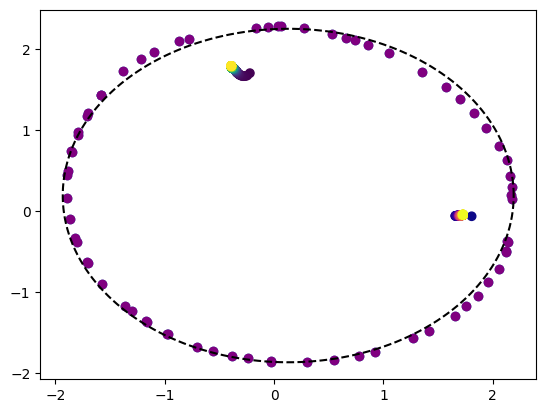

The positions are [ 1.70993   -0.194953  -0.0873098] and [-0.954194   1.58768    0.0312578]
The radius is 2.06683541489428 centered at (0.05169203979362687,0.15481839750021767)
The final angle is 2.3905101027523603
THe lame distance is 4.781020205504721
The original angle is 2.2


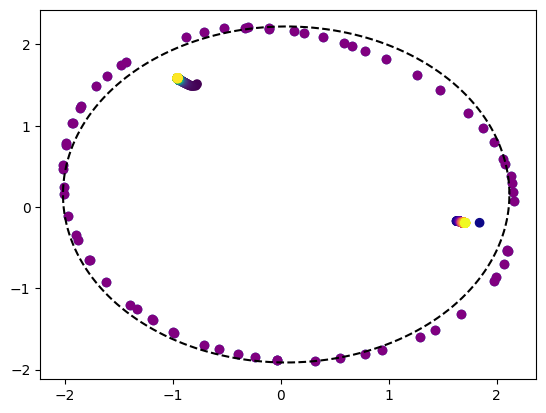

The positions are [ 1.72811   -0.272033   0.0193018] and [-1.2303     1.33049   -0.0177289]
The radius is 2.062606201943608 centered at (0.031495052083988104,0.12519045257175182)
The final angle is 2.609104612866333
THe lame distance is 5.218209225732666
The original angle is 2.4


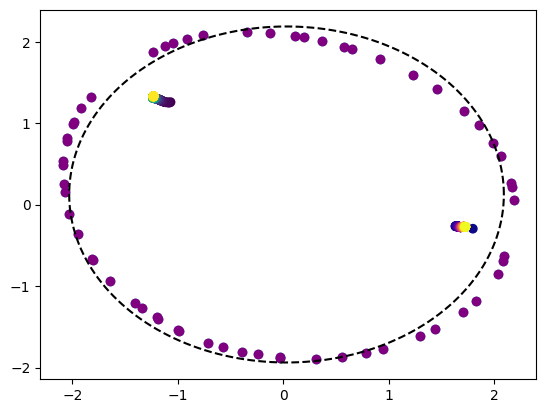

The positions are [1.70118   0.0247278 0.194828 ] and [-1.23741    1.42244    0.0146203]
The radius is 2.074810339987156 centered at (0.0181440038278126,0.15380832086204332)
The final angle is 2.418522555239417
THe lame distance is 4.837045110478834
The original angle is 2.3


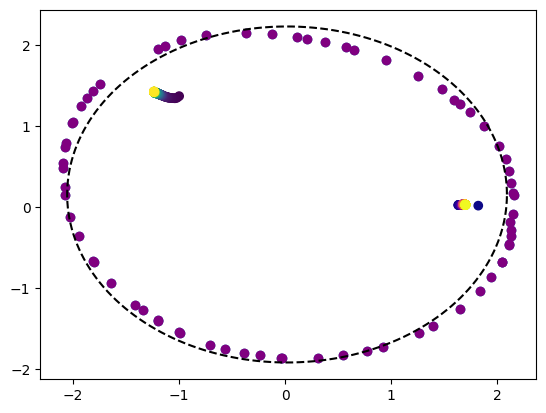

The positions are [ 1.72605    0.161193  -0.0416672] and [-1.70444     0.804303    0.00565806]
The radius is 2.059493570120148 centered at (-0.047579675082204724,0.10728930843858164)
The final angle is 2.712565499402408
THe lame distance is 5.425130998804816
The original angle is 2.7


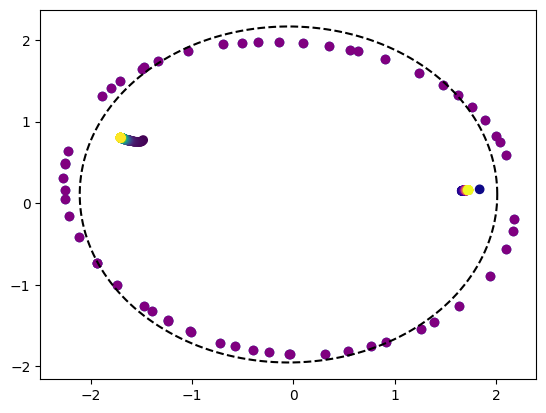

The positions are [ 1.74848   -0.129559   0.0417585] and [-1.72909    0.62279   -0.0488986]
The radius is 2.0625861711805054 centered at (-0.027835515263036754,0.061388108754157865)
The final angle is 2.929968458672169
THe lame distance is 5.859936917344338
The original angle is 2.8


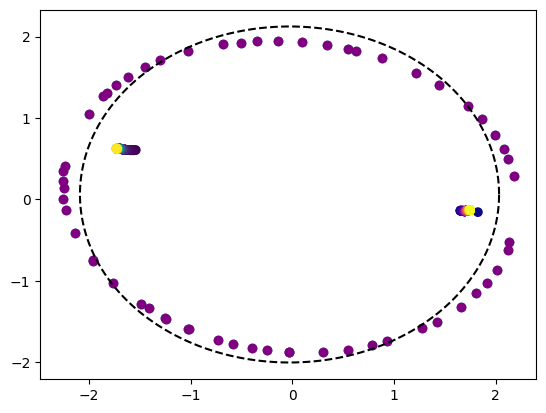

The positions are [ 1.72353     0.00458696 -0.179318  ] and [-1.57516    1.01868   -0.0293882]
The radius is 2.0749262478794064 centered at (-0.008934675781513003,0.11626472910964314)
The final angle is 2.6686974968384436
THe lame distance is 5.337394993676887
The original angle is 2.6


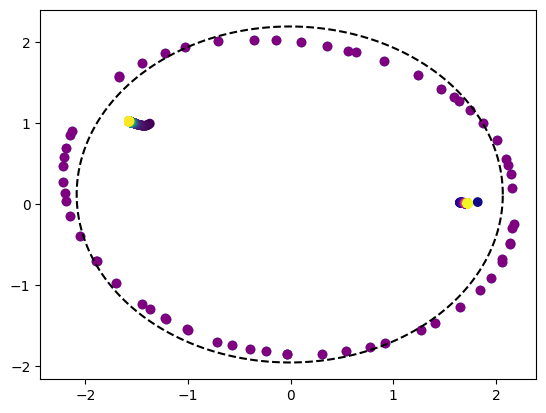

The positions are [ 1.72221   -0.202634  -0.0370972] and [-1.39637     1.20979     0.00332531]
The radius is 2.070569138137772 centered at (-0.01033913030665962,0.12863452569795406)
The final angle is 2.6677184472616804
THe lame distance is 5.335436894523361
The original angle is 2.5


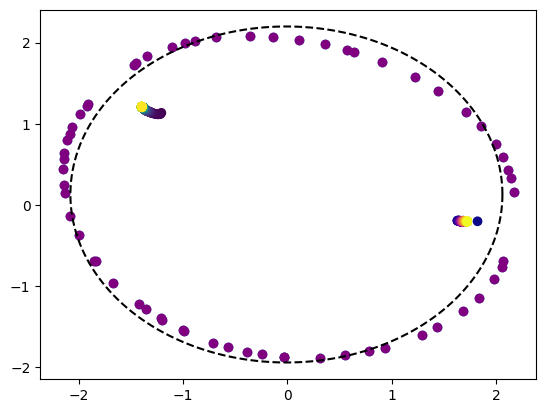

The positions are [ 1.73069    -0.220118   -0.00372313] and [-1.76811    0.509429   0.0367787]
The radius is 2.0667527643086143 centered at (-0.030805048572769524,0.04476516429784748)
The final angle is 3.028018391557261
THe lame distance is 6.056036783114522
The original angle is 2.9


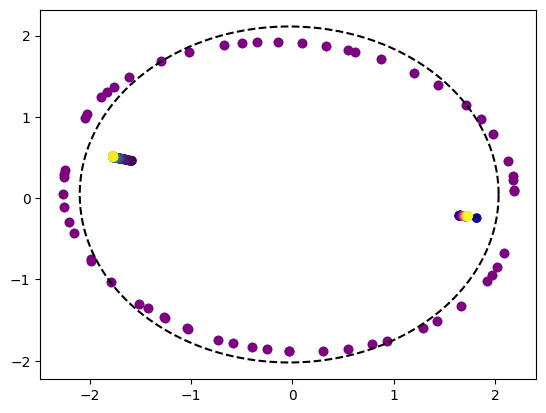

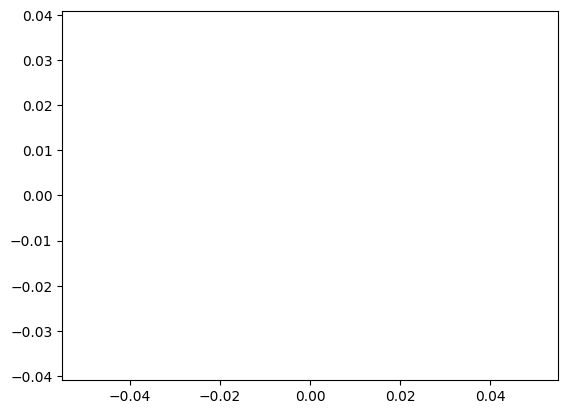

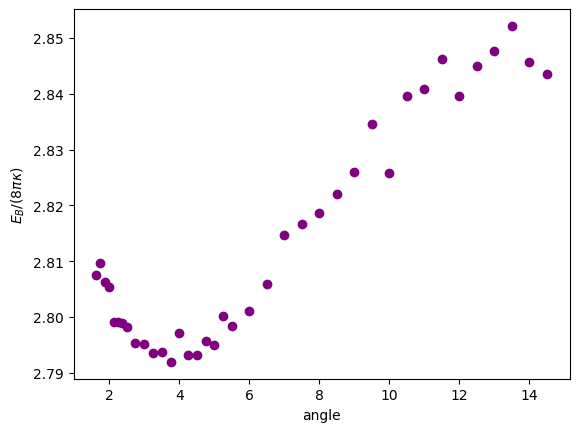

In [199]:
Bead_DISTANCES2 = []
Thetas2 = []
Geo_dist = []
# fig, ax = plt.subplots(layout='constrained')

# fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
            #  ax=ax, orientation='vertical', label='Angle (radians)')
Bendings_2 = []
for i in range(1,39):
    E_Bead_1 = []
    E_Bead_2 = []
    E_Bend = []
    E_Sur = []
    # i = 5
    # Simulation = Sims_dir+"Bending_20.0000_Volume_constraint_10000.0000_33.3189_Edge_reg_0.0000_1.0000_Bead_radius_0.2000_Frenkel_Normal_nopush_str_700.0000_Bead_radius_0.2000_Frenkel_Normal_nopush_str_700.0000_Bonds_Harmonic_400.0000_Harmonic_400.0000_Switch_Newton_Nsim_3"+"/"
    Simulation = Sims_dir+"{}".format(i)+"/"


    Output_dir = Simulation+'Output_data.txt'
    # print(Output_dir)
    Data_sim = json.load(open(Simulation+"Input_file.json"))

    Pos2 = Data_sim['Beads'][1]['Pos']
    # print("The bead is initially at position {}".format(Data_sim["Beads"][1]["Pos"]))

    angle = np.arctan2(Pos2[1],Pos2[0])
    Thetas2.append(angle)
    L0 = Data_sim['Beads'][0]['bonds_constants'][0][1]
    # print("THe angle is {}".format(angle))
    # print("THe length is {}".format(L0))

    Sim_data = np.loadtxt(Output_dir,skiprows=1,usecols=[3,4,5,6,7])



    E_Bend = Sim_data[:,0]
    Bendings_2.append(E_Bend[-1])
    
    E_Vol = Sim_data[:,1]
    E_Bead_1 = Sim_data[:,2]
    E_Bead_2 = Sim_data[:,3]

    E_Tot = Sim_data[:,4]

    Bead_1_traj = np.loadtxt(Simulation+"Bead_0_data.txt",skiprows=1)
    Bead_2_traj = np.loadtxt(Simulation+"Bead_1_data.txt",skiprows=1)
    Bead_1_pos = Bead_1_traj[-1,0:3]
    Bead_2_pos = Bead_2_traj[-1,0:3]
    time = np.arange(len(Bead_1_traj[:,0]))
    plt.scatter(Bead_1_traj[:,0],Bead_1_traj[:,1],c=time,cmap='plasma')
    plt.scatter(Bead_2_traj[:,0],Bead_2_traj[:,1],c=time,cmap='viridis')
    Geo_dist.append(Fitting_circle_bead_distance(Simulation))
    print("The original angle is {}".format(angle))
    # plt.plot(2*x,2*y,color='black',ls='dashed')
    # plt.xlim(0,2)
    # plt.ylim(0,2)
    # plt.title("theta={}".format(angle))
    # plt.xlim(1,2)
    # plt.ylim(-0.5,0.5)
    plt.show()


    Bead_distance = []
    for j in range(len(Bead_1_traj)):
        Bead_1_pos = Bead_1_traj[j,0:3]
        Bead_2_pos = Bead_2_traj[j,0:3]
        r = np.linalg.norm( Bead_1_pos-Bead_2_pos ) - L0
        Bead_distance.append(r)
        

    # ax.plot(Bead_distance,label='{}'.format(angle),color=cmap(norm(angle)))
    Bead_DISTANCES2.append(Bead_distance[-1])
# plt.legend()
# ax.axhline(0.0,ls='dashed',color='black')
plt.axis('equal')
# plt.xlim(-2,2.5)
# plt.ylim(-2,2.5)
# plt.axis('equal')
plt.show()

# ax.cla()

plt.scatter(np.array(Thetas2)*2.0/(0.4),np.array(Bendings_2)/(4*np.pi*20),color='purple')
plt.ylabel(r'$E_B/(8\pi \kappa)$')
plt.xlabel(r'angle')
# plt.scatter(Thetas,np.array(Bendings)/(4*np.pi*20))
# plt.ylabel('E_B/(8*PiKB)')
plt.show()

# plt.ylim(-0.05,0.05)

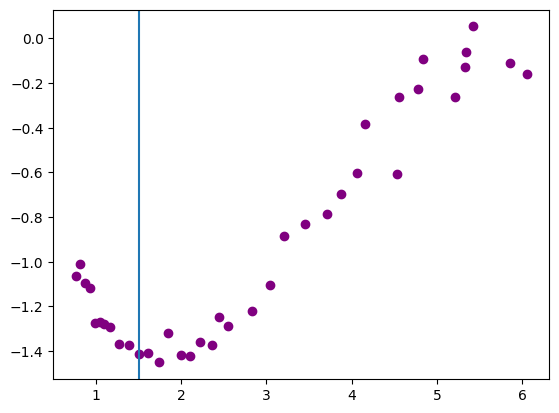

In [205]:
plt.scatter(Geo_dist,(15.0/12.0)*(np.array(Bendings_2)/(4*np.pi) -57),color='purple')
plt.axvline(1.5)

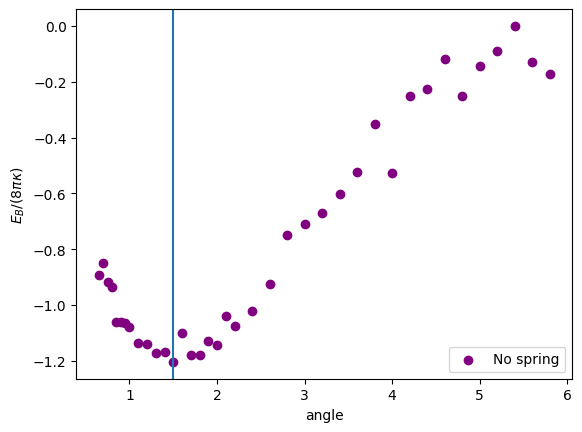

In [119]:
plt.scatter(np.array(Thetas2)*2.0,(np.array(Bendings_2)-np.max(Bendings_2))/(4*np.pi),color='purple',label='No spring')
plt.axvline(1.5)
# plt.xlim(0,4)
# plt.scatter(np.array(Thetas2),np.array(Bendings)/(4*np.pi*20),color='magenta',label='Spring')
plt.ylabel(r'$E_B/(8\pi \kappa)$')
plt.xlabel(r'angle')
plt.legend()

plt.show()

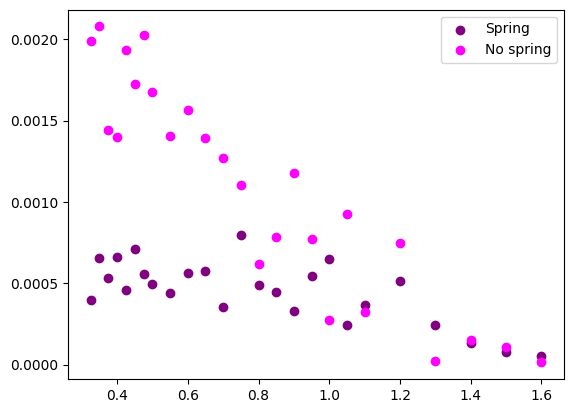

In [165]:
plt.scatter(Thetas,E_Spring_real,c='purple',label='Spring')
plt.scatter(Thetas,E_Spring,c='magenta',label='No spring')
plt.legend()


In [230]:
# Results_dir = current_dir+'/../Results/'
Sims_dir = Results_dir + 'Two_beads_right_spring_inside_outside/'

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


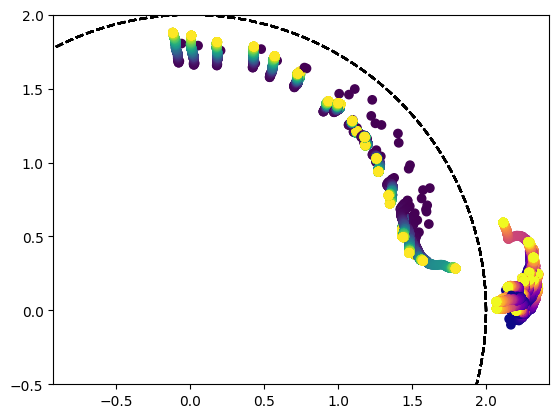

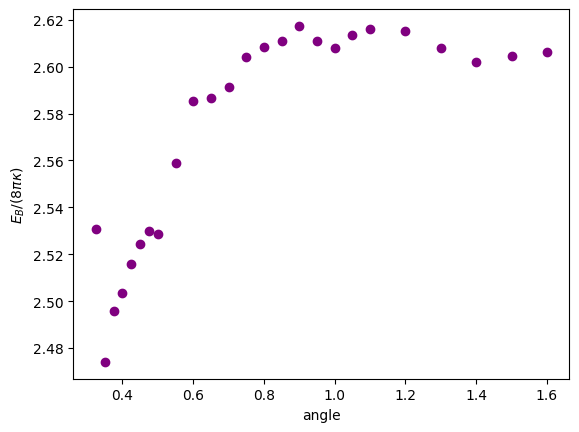

In [231]:
Bead_DISTANCES = []
Thetas = []

# fig, ax = plt.subplots(layout='constrained')

# fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
            #  ax=ax, orientation='vertical', label='Angle (radians)')
Bendings = []
for i in range(1,26):
    E_Bead_1 = []
    E_Bead_2 = []
    E_Bend = []
    E_Sur = []
    # i = 5
    # Simulation = Sims_dir+"Bending_20.0000_Volume_constraint_10000.0000_33.3189_Edge_reg_0.0000_1.0000_Bead_radius_0.2000_Frenkel_Normal_nopush_str_700.0000_Bead_radius_0.2000_Frenkel_Normal_nopush_str_700.0000_Bonds_Harmonic_400.0000_Harmonic_400.0000_Switch_Newton_Nsim_3"+"/"
    Simulation = Sims_dir+"{}".format(i)+"/"


    Output_dir = Simulation+'Output_data.txt'
    # print(Output_dir)
    Data_sim = json.load(open(Simulation+"Input_file.json"))

    Pos2 = Data_sim['Beads'][1]['Pos']
    # print("The bead is initially at position {}".format(Data_sim["Beads"][1]["Pos"]))

    angle = np.arctan2(Pos2[1],Pos2[0])
    Thetas.append(angle)
    L0 = Data_sim['Beads'][0]['bonds_constants'][0][1]
    # print("THe angle is {}".format(angle))
    # print("THe length is {}".format(L0))

    Sim_data = np.loadtxt(Output_dir,skiprows=1,usecols=[3,4,5,6,7])



    E_Bend = Sim_data[:,0]
    Bendings.append(E_Bend[-1])
    E_Vol = Sim_data[:,1]
    E_Bead_1 = Sim_data[:,2]
    E_Bead_2 = Sim_data[:,3]

    E_Tot = Sim_data[:,4]

    Bead_1_traj = np.loadtxt(Simulation+"Bead_0_data.txt",skiprows=1)
    Bead_2_traj = np.loadtxt(Simulation+"Bead_1_data.txt",skiprows=1)
    Bead_1_pos = Bead_1_traj[-1,0:3]
    Bead_2_pos = Bead_2_traj[-1,0:3]
    time = np.arange(len(Bead_1_traj[:,0]))
    plt.scatter(Bead_1_traj[:,0],Bead_1_traj[:,1],c=time,cmap='plasma')
    plt.scatter(Bead_2_traj[:,0],Bead_2_traj[:,1],c=time,cmap='viridis')
    plt.plot(2*x,2*y,color='black',ls='dashed')
    plt.xlim(0,2)
    plt.ylim(0,2)
    # plt.title("theta={}".format(angle))
    # plt.xlim(1,2)
    # plt.ylim(-0.5,0.5)
    # plt.show()


    Bead_distance = []
    for j in range(len(Bead_1_traj)):
        Bead_1_pos = Bead_1_traj[j,0:3]
        Bead_2_pos = Bead_2_traj[j,0:3]
        r = np.linalg.norm( Bead_1_pos-Bead_2_pos ) - L0
        Bead_distance.append(r)
        

    # ax.plot(Bead_distance,label='{}'.format(angle),color=cmap(norm(angle)))
    Bead_DISTANCES.append(Bead_distance[-1])
# plt.legend()
# ax.axhline(0.0,ls='dashed',color='black')
plt.axis('equal')
plt.xlim(-0.5,2.0)
plt.ylim(-0.5,2.0)
plt.show()

# ax.cla()



plt.scatter(Thetas,np.array(Bendings)/(4*np.pi*20),color='purple')
plt.ylabel(r'$E_B/(8\pi \kappa)$')
plt.xlabel(r'angle')
plt.show()

# plt.ylim(-0.05,0.05)

In [248]:
# Results_dir = current_dir+'/../Results/'
Sims_dir = Results_dir + 'Two_beads_no_spring_inside_outside/'

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


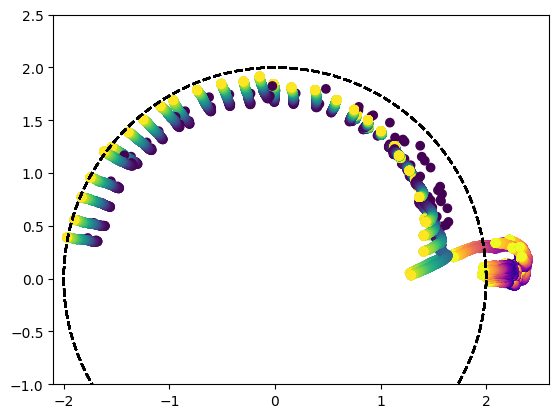

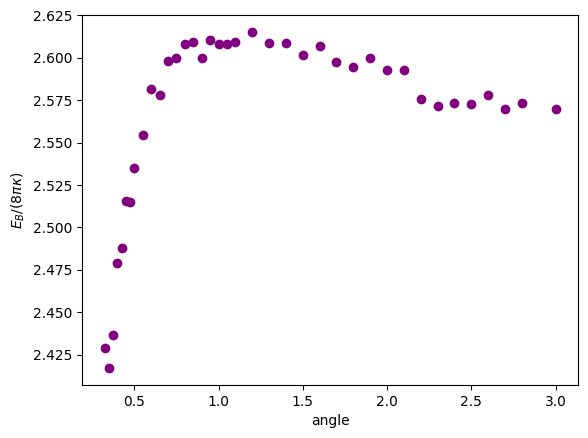

In [249]:
Bead_DISTANCES2 = []
Thetas2 = []

# fig, ax = plt.subplots(layout='constrained')

# fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
            #  ax=ax, orientation='vertical', label='Angle (radians)')
Bendings_2 = []
for i in range(1,39):
    E_Bead_1 = []
    E_Bead_2 = []
    E_Bend = []
    E_Sur = []
    # i = 5
    # Simulation = Sims_dir+"Bending_20.0000_Volume_constraint_10000.0000_33.3189_Edge_reg_0.0000_1.0000_Bead_radius_0.2000_Frenkel_Normal_nopush_str_700.0000_Bead_radius_0.2000_Frenkel_Normal_nopush_str_700.0000_Bonds_Harmonic_400.0000_Harmonic_400.0000_Switch_Newton_Nsim_3"+"/"
    Simulation = Sims_dir+"{}".format(i)+"/"


    Output_dir = Simulation+'Output_data.txt'
    # print(Output_dir)
    Data_sim = json.load(open(Simulation+"Input_file.json"))

    Pos2 = Data_sim['Beads'][1]['Pos']
    # print("The bead is initially at position {}".format(Data_sim["Beads"][1]["Pos"]))

    angle = np.arctan2(Pos2[1],Pos2[0])
    Thetas2.append(angle)
    L0 = Data_sim['Beads'][0]['bonds_constants'][0][1]
    # print("THe angle is {}".format(angle))
    # print("THe length is {}".format(L0))

    Sim_data = np.loadtxt(Output_dir,skiprows=1,usecols=[3,4,5,6,7])



    E_Bend = Sim_data[:,0]
    Bendings_2.append(E_Bend[-1])
    E_Vol = Sim_data[:,1]
    E_Bead_1 = Sim_data[:,2]
    E_Bead_2 = Sim_data[:,3]

    E_Tot = Sim_data[:,4]

    Bead_1_traj = np.loadtxt(Simulation+"Bead_0_data.txt",skiprows=1)
    Bead_2_traj = np.loadtxt(Simulation+"Bead_1_data.txt",skiprows=1)
    Bead_1_pos = Bead_1_traj[-1,0:3]
    Bead_2_pos = Bead_2_traj[-1,0:3]
    time = np.arange(len(Bead_1_traj[:,0]))
    plt.scatter(Bead_1_traj[:,0],Bead_1_traj[:,1],c=time,cmap='plasma')
    plt.scatter(Bead_2_traj[:,0],Bead_2_traj[:,1],c=time,cmap='viridis')
    plt.plot(2*x,2*y,color='black',ls='dashed')
    plt.xlim(0,2)
    plt.ylim(0,2)
    # plt.title("theta={}".format(angle))
    # plt.xlim(1,2)
    # plt.ylim(-0.5,0.5)
    # plt.show()


    Bead_distance = []
    for j in range(len(Bead_1_traj)):
        Bead_1_pos = Bead_1_traj[j,0:3]
        Bead_2_pos = Bead_2_traj[j,0:3]
        r = np.linalg.norm( Bead_1_pos-Bead_2_pos ) - L0
        Bead_distance.append(r)
        

    # ax.plot(Bead_distance,label='{}'.format(angle),color=cmap(norm(angle)))
    Bead_DISTANCES.append(Bead_distance[-1])
# plt.legend()
# ax.axhline(0.0,ls='dashed',color='black')
plt.axis('equal')
plt.xlim(-2.0,2.5)
plt.ylim(-1.0,2.5)
# plt.axis('equal')
plt.show()

# ax.cla()

plt.scatter(Thetas2,np.array(Bendings_2)/(4*np.pi*20),color='purple')
plt.ylabel(r'$E_B/(8\pi \kappa)$')
plt.xlabel(r'angle')
# plt.scatter(Thetas,np.array(Bendings)/(4*np.pi*20))
# plt.ylabel('E_B/(8*PiKB)')
plt.show()

# plt.ylim(-0.05,0.05)

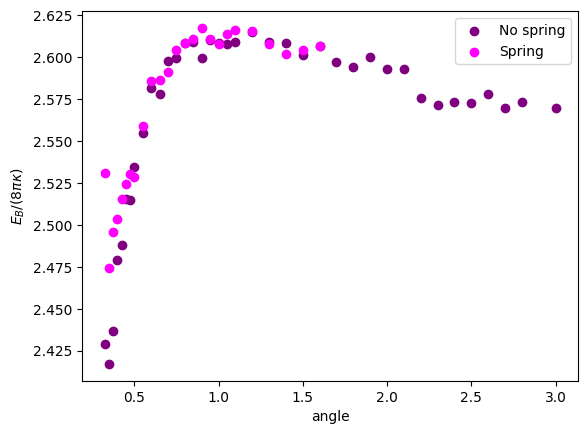

In [234]:
plt.scatter(Thetas2,np.array(Bendings_2)/(4*np.pi*20),color='purple',label='No spring')
plt.scatter(Thetas,np.array(Bendings)/(4*np.pi*20),color='magenta',label='Spring')
plt.ylabel(r'$E_B/(8\pi \kappa)$')
plt.xlabel(r'angle')
plt.legend()

In [190]:

Sims_dir = Results_dir + 'Wrap_with_tube_GM/'

In [191]:
cmap = mpl.cm.plasma
norm = mpl.colors.Normalize(vmin=0.25, vmax=0.9)

/tmp/ipykernel_426763/1616633579.py:55: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(Bead_2_traj[:,0],Bead_2_traj[:,2],c=cmap(norm(angle)))


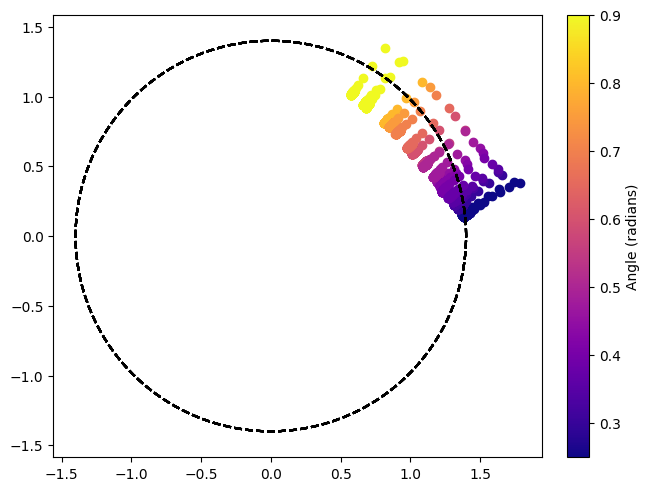

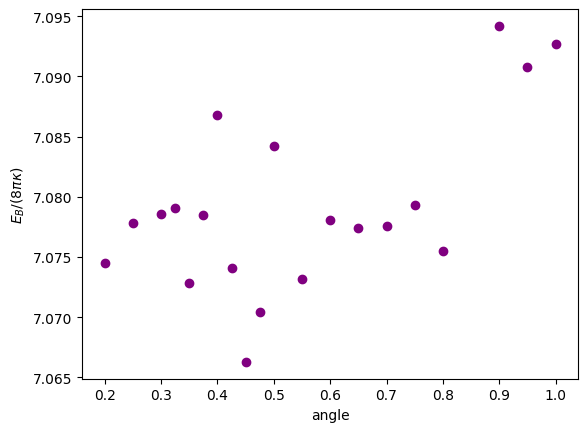

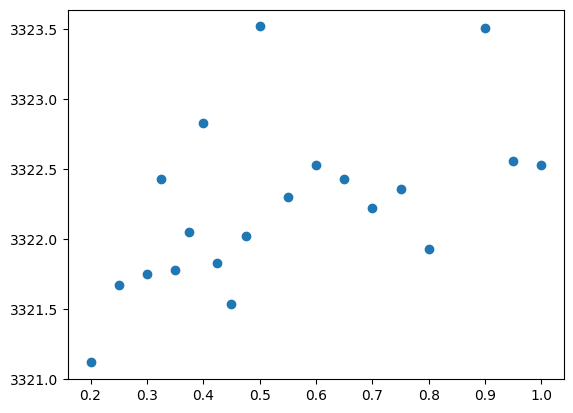

In [194]:
Bead_DISTANCES = []
Thetas = []

fig, ax = plt.subplots(layout='constrained')

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             ax=ax, orientation='vertical', label='Angle (radians)')
Bendings = []
E_Tots = []
for i in range(1,22):
    E_Bead_1 = []
    E_Bead_2 = []
    E_Bend = []
    E_Sur = []
    # i = 5
    # Simulation = Sims_dir+"Bending_20.0000_Volume_constraint_10000.0000_33.3189_Edge_reg_0.0000_1.0000_Bead_radius_0.2000_Frenkel_Normal_nopush_str_700.0000_Bead_radius_0.2000_Frenkel_Normal_nopush_str_700.0000_Bonds_Harmonic_400.0000_Harmonic_400.0000_Switch_Newton_Nsim_3"+"/"
    Simulation = Sims_dir+"{}".format(i)+"/"


    Output_dir = Simulation+'Output_data.txt'
    # print(Output_dir)
    Data_sim = json.load(open(Simulation+"Input_file.json"))

    Pos2 = Data_sim['Beads'][1]['Pos']
    # print("The bead is initially at position {}".format(Data_sim["Beads"][1]["Pos"]))

    # angle = np.arctan2(Pos2[1],Pos2[0])
    angle = Data_sim['theta']
    if( abs(angle-0.85)<1e-4): 
        continue
    Thetas.append(angle)
    # L0 = Data_sim['Beads'][0]['bonds_constants'][0][1]
    # print("THe angle is {}".format(angle))
    # print("THe length is {}".format(L0))

    Sim_data = np.loadtxt(Output_dir,skiprows=1,usecols=[4,5,6,7,8])



    E_Bend = Sim_data[:,0]
    Bendings.append(E_Bend[-1])
    E_Vol = Sim_data[:,1]
    E_Bead_1 = Sim_data[:,2]
    E_Bead_2 = Sim_data[:,3]

    E_Tot = Sim_data[:,4]
    E_Tots.append(E_Tot[-1])

    Bead_1_traj = np.loadtxt(Simulation+"Bead_0_data.txt",skiprows=1)
    Bead_2_traj = np.loadtxt(Simulation+"Bead_1_data.txt",skiprows=1)
    Bead_1_pos = Bead_1_traj[-1,0:3]
    Bead_2_pos = Bead_2_traj[-1,0:3]
    time = np.arange(len(Bead_1_traj[:,0]))
    # plt.scatter(Bead_1_traj[:,0],Bead_1_traj[:,1],c=time,cmap='plasma')
    ax.scatter(Bead_2_traj[:,0],Bead_2_traj[:,2],c=cmap(norm(angle)))
    ax.plot(1.4*x,1.4*y,color='black',ls='dashed')
    # plt.title("theta={}".format(angle))
    # plt.xlim(1,2)
    # plt.ylim(-0.5,0.5)
    # plt.show()


    Bead_distance = []
    for j in range(len(Bead_1_traj)):
        Bead_1_pos = Bead_1_traj[j,0:3]
        Bead_2_pos = Bead_2_traj[j,0:3]
        r = np.linalg.norm( Bead_1_pos-Bead_2_pos ) 
        Bead_distance.append(r)
        

    # ax.plot(Bead_distance,label='{}'.format(angle),color=cmap(norm(angle)))
    Bead_DISTANCES.append(Bead_distance[-1])
# plt.legend()
# ax.axhline(0.0,ls='dashed',color='black')
ax.axis('equal')
plt.show()

ax.cla()


plt.scatter(Thetas,np.array(Bendings)/(4*np.pi*4),color='purple')
# plt.scatter(Thetas,np.array(Bendings)/(4*np.pi*20),color='purple')
plt.ylabel(r'$E_B/(8\pi \kappa)$')
plt.xlabel(r'angle')
plt.show()

plt.scatter(Thetas,np.array(E_Tots))
plt.show()


# plt.ylim(-0.05,0.05)

In [119]:
Thetas

[0.25,
 0.2,
 0.3,
 0.325,
 0.45,
 0.425,
 0.4,
 0.35,
 0.375,
 0.55,
 0.5,
 0.475,
 0.6,
 0.8,
 0.75,
 0.95,
 1.0,
 0.65,
 0.7,
 0.9]